# Exploratory Data Analysis of MLRan

In [ ]:
# import 
# you may not need to run this cell, you can just run the next cell
import sys
sys.path.append('/mnt/storage/faithfulco/python_packages')

In [ ]:
# libraries
import sys
import os
import json
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
df_mlran_meta = pd.read_csv('FS_MLRan_Datasets/mlran_dataset_metadata.csv')
df_mlran_meta.head()

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,elderan,2014:10:10,2014-10-10,2014:10:10,2014,1413149304,2014-10-12,2014
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,elderan,2015:04:02,2015-04-02,2015:04:02,2015,1428563179,2015-04-09,2015
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,elderan,2014:01:29,2014-01-29,2014:01:29,2014,1401330145,2014-05-29,2014
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,elderan,2015:08:09,2015-08-09,2015:08:09,2015,1439196631,2015-08-10,2015
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,elderan,1992:06:19,1992-06-19,NaN,1992,1416574498,2014-11-21,2014


In [45]:
# Shape of the dataset
print("\nShape of the dataset:")
print(df_mlran_meta.shape)

# Check basic information about the dataset
print("\nDataset Info:")
display(df_mlran_meta.info())


Shape of the dataset:
(4880, 19)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880 entries, 0 to 4879
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   sample_id                        4880 non-null   int64 
 1   sha256                           4880 non-null   object
 2   sample_type                      4880 non-null   int64 
 3   ransomware_family                4880 non-null   object
 4   family_label                     4880 non-null   int64 
 5   ransomware_type                  4880 non-null   object
 6   type_label                       4880 non-null   int64 
 7   sha1                             4880 non-null   object
 8   md5                              4880 non-null   object
 9   extension                        4834 non-null   object
 10  detections                       4880 non-null   object
 11  source                           4880 non-null

None

In [10]:
# Check for missing values
missing_values = df_mlran_meta.isnull().sum()
missing_percentage = (missing_values / len(df_mlran_meta)) * 100

# Create a DataFrame to display the missing count and percentage
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage.round(2)
})
missing_data


,Missing Values,Missing Percentage (%)
sample_id,0,0.00
sha256,0,0.00
sample_type,0,0.00
ransomware_family,0,0.00
family_label,0,0.00
ransomware_type,0,0.00
type_label,0,0.00
sha1,0,0.00
md5,0,0.00
extension,46,0.94


**REMARK:** The data contains missing values in two columns: `extension` (46 missing values, 0.94%) and `timestamp` (660 missing values, 13.51%). All other columns have no missing values.

## Sample type plot

In [11]:
# Assuming df_mlran_meta is available
sample_type_counts = df_mlran_meta['sample_type'].value_counts()

# Calculate percentage for each class
sample_type_percentage = (sample_type_counts / len(df_mlran_meta)) * 100

sample_type_percentage_df = pd.DataFrame({"Count": sample_type_counts, "Percentage (%)": sample_type_percentage.round(2)})
sample_type_percentage_df

,Count,Percentage (%)
sample_type,,
0,2550,52.25
1,2330,47.75


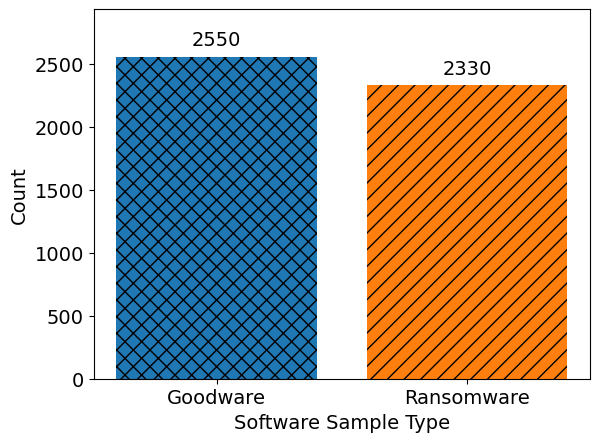

In [22]:
# Generate the plot based on the data from df_mlran_meta
sample_type_counts = df_mlran_meta['sample_type'].value_counts()

# Plotting the bar chart with color-blind friendly colours and shapes
fig, ax = plt.subplots()

# Plotting the bars with different hatching patterns
bars = ax.bar(sample_type_counts.index.map({0: 'Goodware', 1: 'Ransomware'}), sample_type_counts.values, color=['#1f77b4', '#ff7f0e'])

# Adding hatch patterns for better visibility
bars[0].set_hatch('xx')  # Crosshatch for Goodware
bars[1].set_hatch('//')  # Diagonal lines for Ransomware

# Adding frequency numbers on top of the bars with consistent spacing
for bar in bars:
    yval = bar.get_height()
    # Calculate the vertical offset to ensure it's above the bar without exceeding the plot boundary
    offset = 0.025 * yval
    ax.text(bar.get_x() + bar.get_width() / 2, yval + offset, int(yval), ha='center', va='bottom', fontsize=14)

# Increase font size for the axis labels and title
#ax.set_title('Distribution of Software Sample Types', fontsize=14)  # Set title font size
ax.set_xlabel('Software Sample Type', fontsize=14)  # Set x-axis label font size
ax.set_ylabel('Count', fontsize=14)  # Set y-axis label font size

# Also, you can adjust the font size for tick labels (the "Goodware" and "Ransomware" labels)
ax.tick_params(axis='x', labelsize=14)  # Adjust the font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=14)  # Adjust the font size for y-axis tick labels

# Set the y-axis limit based on the maximum value of the data
# This helps increase readability by providing some space above the highest bar
max_y_value = max(sample_type_counts.values)
ax.set_ylim(0, max_y_value * 1.15)  # Set the upper limit slightly higher than the max value


# Display the plot
plt.show()

In [15]:
# Save the plot as a PDF file
fig.savefig('outputs/EDA/software_type.pdf', format='pdf' ,bbox_inches='tight')

In [23]:
# Save the plot as a PDF file
fig.savefig('outputs/EDA/software_type.png', format='png' ,bbox_inches='tight')

**REMARK:** The dataset comprises a total of **4880 samples**, with **2550 samples** belonging to **Goodware (0)** and **2330 samples** belonging to **Ransomware (1)**. The dataset is fairly balanced.

## Ransomware type plot

In [16]:
df_mlran_meta[df_mlran_meta['sample_type']==1].ransomware_type.value_counts()

ransomware_type
crypto    1140
raas       468
modern     449
locker     273
Name: count, dtype: int64

In [24]:
# Generate the counts for ransomware_type
ransomware_type_counts = df_mlran_meta[df_mlran_meta['sample_type'] == 1]['ransomware_type'].value_counts()

# Create a DataFrame with the value counts
ransomware_type_df = pd.DataFrame({
    'Value': ransomware_type_counts,
    'Percentage': ((ransomware_type_counts / ransomware_type_counts.sum()) * 100).round(2)
})
ransomware_type_df

,Value,Percentage
ransomware_type,,
crypto,1140,48.93
raas,468,20.09
modern,449,19.27
locker,273,11.72


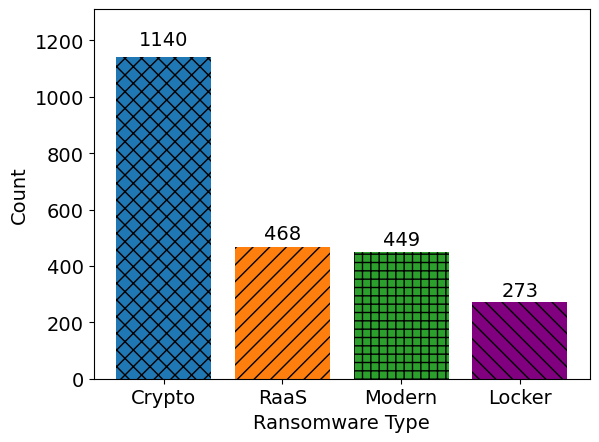

In [25]:
# Generate the plot based on the ransomware_type distribution for Ransomware (sample_type == 1)
ransomware_type_counts = df_mlran_meta[df_mlran_meta['sample_type'] == 1]['ransomware_type'].value_counts()

# Plotting the bar chart with color-blind friendly colours and shapes
fig, ax = plt.subplots()

# Mapping the ransomware types to sentence case
ransomware_type_map = {
    'crypto': 'Crypto',
    'raas': 'RaaS',
    'modern': 'Modern',
    'locker': 'Locker'
}

# Plotting the bars with different hatching patterns
bars = ax.bar(ransomware_type_counts.index.map(ransomware_type_map), ransomware_type_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#800080'])

# Adding hatch patterns for better visibility
bars[0].set_hatch('xx')  # Crosshatch for the first bar (crypto)
bars[1].set_hatch('//')  # Diagonal lines for the second bar (raas)
bars[2].set_hatch('++')  # Grid pattern for the third bar (modern)
bars[3].set_hatch('\\\\')  # Diagonal backslash for the fourth bar (locker)

# Adding frequency numbers on top of the bars with consistent spacing
for bar in bars:
    yval = bar.get_height()
    # Calculate the vertical offset to ensure it's above the bar without exceeding the plot boundary
    offset = 0.025 * yval
    ax.text(bar.get_x() + bar.get_width() / 2, yval + offset, int(yval), ha='center', va='bottom', fontsize=14)

# Increase font size for the axis labels and title
#ax.set_title('Distribution of Ransomware Types', fontsize=14)
ax.set_xlabel('Ransomware Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Adjust the font size for tick labels
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Set the y-axis limit based on the maximum value of the data
max_y_value = max(ransomware_type_counts.values)  # Remove the parentheses here
ax.set_ylim(0, max_y_value * 1.15)  # Set the upper limit slightly higher than the max value

# Display the plot
plt.show()


In [21]:
# Save the plot as a PDF file
fig.savefig('outputs/EDA/ransomware_type.pdf', format='pdf' ,bbox_inches='tight')

In [26]:
# Save the plot as a PDF file
fig.savefig('outputs/EDA/ransomware_type.png', format='png' ,bbox_inches='tight')

## Ransomware families plot

In [27]:
pd.set_option('display.max_rows', None)  # Display all rows

In [28]:
# Generate the counts for ransomware_family
ransomware_family_counts = df_mlran_meta[df_mlran_meta['sample_type'] == 1]['ransomware_family'].value_counts()

# Create a DataFrame with the value counts
ransomware_family_df = pd.DataFrame({
    'Value': ransomware_family_counts,
    'Percentage': ((ransomware_family_counts / ransomware_family_counts.sum()) * 100).round(2)
})
ransomware_family_df

,Value,Percentage
ransomware_family,,
pajetbin,134,5.75
cryptolocker,104,4.46
reveton,89,3.82
locker,87,3.73
virlock,81,3.48
shodi,71,3.05
gandcrab,68,2.92
mbrlock,66,2.83
dharma,64,2.75


In [29]:
# Creating the category map based on the df_mlran_meta[['ransomware_family', 'ransomware_type']]
category_map = pd.Series(df_mlran_meta['ransomware_type'].values, index=df_mlran_meta['ransomware_family']).to_dict()

# Display the category map
category_map

{'cryptolocker': 'crypto',
 'cryptowall': 'crypto',
 'kovter': 'locker',
 'matsnu': 'locker',
 'locker': 'crypto',
 'critroni': 'crypto',
 'kollah': 'crypto',
 'reveton': 'locker',
 'trojan-ransom': 'crypto',
 'teslacrypt': 'crypto',
 'pdpcoder': 'crypto',
 'medusalocker': 'raas',
 'nanolocker': 'crypto',
 'gandcrab': 'raas',
 'padcrypt': 'raas',
 'locky': 'crypto',
 'wannacry': 'crypto',
 'maze': 'modern',
 'ryuk': 'raas',
 'cryptxxx': 'crypto',
 'try2cry': 'crypto',
 'egregor': 'modern',
 'nemty': 'raas',
 'wastedlocker': 'raas',
 '7ev3n': 'crypto',
 'samsam': 'crypto',
 'sage': 'crypto',
 'lockergoga': 'crypto',
 'virlock': 'crypto',
 'philadelphia': 'raas',
 'magniber': 'crypto',
 'cerber': 'raas',
 'krakencryptor': 'raas',
 'dharma': 'raas',
 'clop': 'modern',
 'mamba': 'crypto',
 'dmalocker': 'crypto',
 'vhd': 'raas',
 'deathransom': 'crypto',
 'revil': 'modern',
 'phobos': 'raas',
 'mbrlock': 'locker',
 'crypmodadv': 'crypto',
 'shade': 'crypto',
 'mira': 'crypto',
 'wacatac': '

In [ ]:
from collections import Counter

# Count the occurrences of each category
category_count = Counter(category_map.values())

# Display the count for each category
category_count

Counter({'crypto': 32, 'modern': 15, 'raas': 13, 'locker': 4, 'goodware': 1})

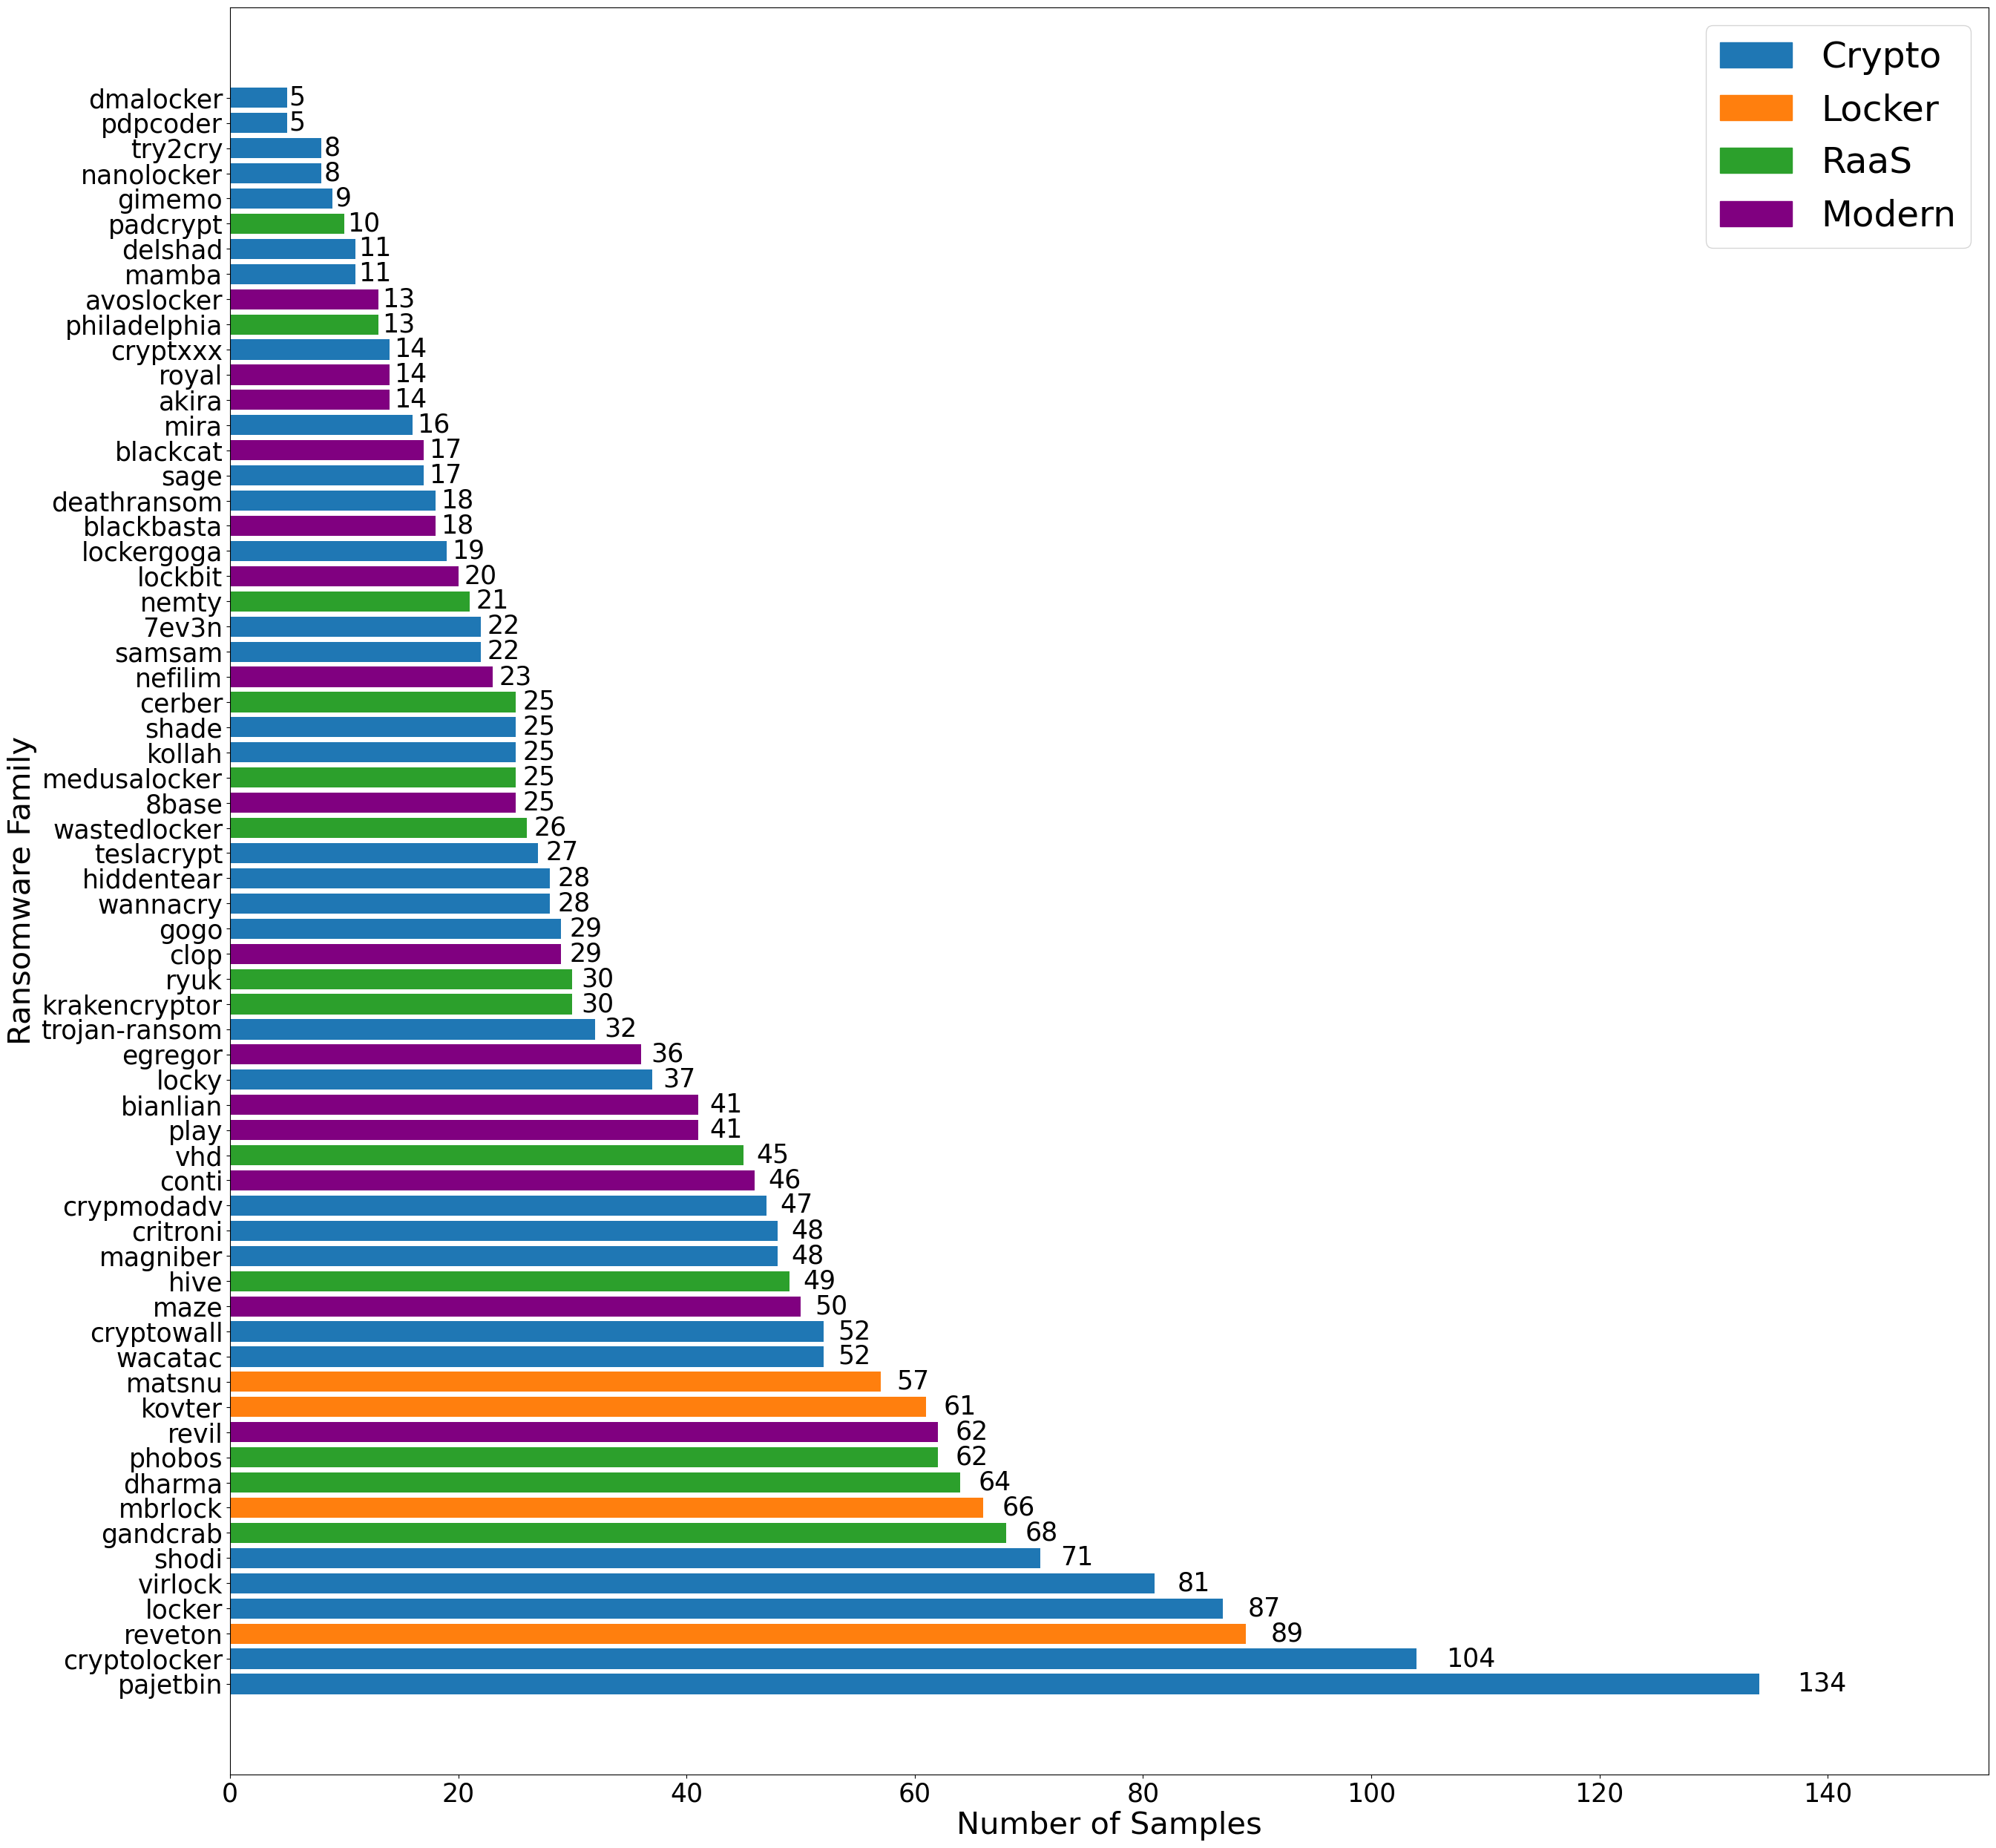

In [31]:
# Sample data for ransomware_family distribution
ransomware_family_counts = df_mlran_meta[df_mlran_meta['sample_type'] == 1]['ransomware_family'].value_counts()

# Creating DataFrame from sample data
df_ransomware_family = pd.Series(ransomware_family_counts)

# Creating the category map based on the df_mlran_meta[['ransomware_family', 'ransomware_type']]
category_map = pd.Series(df_mlran_meta['ransomware_type'].values, index=df_mlran_meta['ransomware_family']).to_dict()

# Assigning colours for each category
category_colors = {
    'crypto': '#1f77b4',  # Blue for crypto
    'locker': '#ff7f0e',  # Orange for locker
    'raas': '#2ca02c',    # Green for RaaS
    'modern': '#800080'   # Purple for modern
}

# Plotting the horizontal bar chart with the appropriate color for each category
fig, ax = plt.subplots(figsize=(27, 25))

# Create a list of colors for each bar based on its category
colors = [category_colors.get(category_map.get(family, 'modern'), '#800080') for family in df_ransomware_family.index]

# Plotting the bars in horizontal orientation with the specified colors
bars = ax.barh(df_ransomware_family.index, df_ransomware_family.values, color=colors)

# Adding frequency numbers on the bars with consistent spacing
for bar in bars:
    xval = bar.get_width()
    offset = 0.025 * xval
    ax.text(xval + offset, bar.get_y() + bar.get_height() / 2, f'{int(xval)}', va='center', fontsize=25)

# Increase font size for the axis labels and title
#ax.set_title('Distribution of Ransomware Families Colour-coded by Ransomware Type', fontsize=35)
ax.set_xlabel('Number of Samples', fontsize=30)
ax.set_ylabel('Ransomware Family', fontsize=30)

# Adjust the font size for tick labels
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

# Set the x-axis limit based on the maximum value of the data
max_x_value = max(df_ransomware_family.values)
ax.set_xlim(0, max_x_value * 1.15)  # Set the upper limit slightly higher than the max value

# Adding a legend to differentiate the categories
handles = [
    plt.Rectangle((0, 0), 1, 1, color=category_colors['crypto'], label='Crypto'),
    plt.Rectangle((0, 0), 1, 1, color=category_colors['locker'], label='Locker'),
    plt.Rectangle((0, 0), 1, 1, color=category_colors['raas'], label='RaaS'),
    plt.Rectangle((0, 0), 1, 1, color=category_colors['modern'], label='Modern')
]
ax.legend(handles=handles, loc='upper right', fontsize=35)

# Display the plot
plt.tight_layout()
plt.show()


In [33]:
# Save the plot as a PDF file
fig.savefig('outputs/EDA/ransomware_family.pdf', format='pdf' ,bbox_inches='tight')
fig.savefig('outputs/EDA/ransomware_family.png', format='png' ,bbox_inches='tight')

## Goodware distribution

In [34]:
# Generate the counts for goodware sources
goodware_source_counts = df_mlran_meta[df_mlran_meta['sample_type'] == 0]['source'].value_counts()

# Create a DataFrame with the value counts and percentage
goodware_source_df = pd.DataFrame({
    'Value': goodware_source_counts,
    'Percentage': ((goodware_source_counts / goodware_source_counts.sum()) * 100).round(2)
})
goodware_source_df

,Value,Percentage
source,,
software_informer_most_popular,1212,47.53
software_informer_productivity,187,7.33
software_informer_developer_tools,171,6.71
software_informer_communications,170,6.67
software_informer_lifestyle,158,6.20
software_informer_business,150,5.88
software_informer_education,144,5.65
software_informer_antivirus_security,128,5.02
software_informer_internet_tools,103,4.04


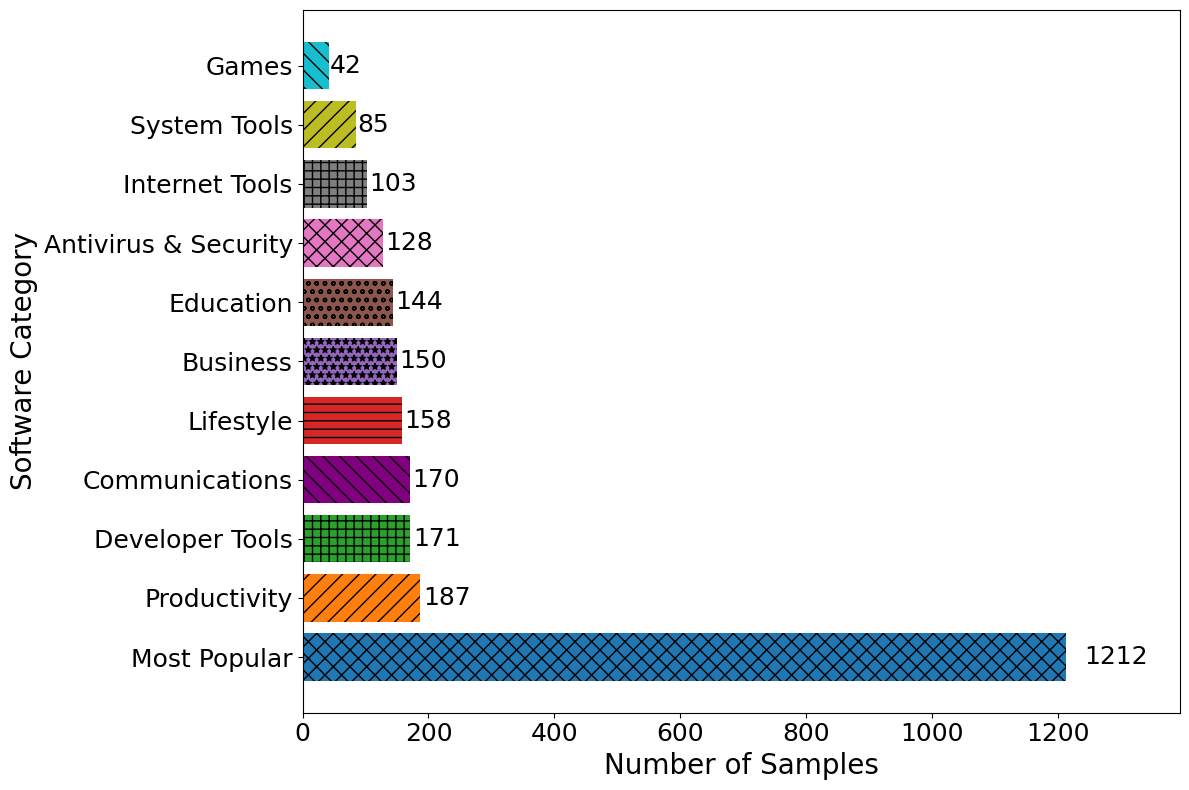

In [35]:
# Sample data for source distribution based on the provided output
source_counts = df_mlran_meta[df_mlran_meta['sample_type'] == 0].source.value_counts()

# Creating DataFrame from sample data
df_source = pd.Series(source_counts)

# Creating a map for category names
category_map = {
    'software_informer_most_popular': 'Most Popular',
    'software_informer_productivity': 'Productivity',
    'software_informer_developer_tools': 'Developer Tools',
    'software_informer_communications': 'Communications',
    'software_informer_lifestyle': 'Lifestyle',
    'software_informer_business': 'Business',
    'software_informer_education': 'Education',
    'software_informer_antivirus_security': 'Antivirus & Security',
    'software_informer_internet_tools': 'Internet Tools',
    'software_informer_system_tools': 'System Tools',
    'software_informer_games': 'Games'
}

# Map source counts to category names
df_source.index = df_source.index.map(category_map)

# Plotting the horizontal bar chart with color-blind friendly colours and hatch patterns
fig, ax = plt.subplots(figsize=(12, 8))

# Define hatch patterns
hatch_patterns = ['xx', '//', '++', '\\\\', '--', '**', 'oo', 'xx', '++', '//', '\\\\']

# Plotting the bars in horizontal orientation with the specified colors
bars = ax.barh(df_source.index, df_source.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#800080', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Adding hatch patterns for better visibility
for i, bar in enumerate(bars):
    bar.set_hatch(hatch_patterns[i % len(hatch_patterns)])  # Cycle through hatch patterns

# Adding frequency numbers on the bars with consistent spacing
for bar in bars:
    xval = bar.get_width()
    offset = 0.025 * xval
    ax.text(xval + offset, bar.get_y() + bar.get_height() / 2, f'{int(xval)}', va='center', fontsize=18)

# Increase font size for the axis labels and title
#ax.set_title('Distribution of Goodware Sample Categories', fontsize=20)
ax.set_xlabel('Number of Samples', fontsize=20)
ax.set_ylabel('Software Category', fontsize=20)

# Adjust the font size for tick labels
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Set the x-axis limit based on the maximum value of the data
max_x_value = max(df_source.values)
ax.set_xlim(0, max_x_value * 1.15)  # Set the upper limit slightly higher than the max value

# Display the plot
plt.tight_layout()
plt.show()

In [36]:
# Save the plot as a PDF file
fig.savefig('outputs/EDA/goodware_category.pdf', format='pdf' ,bbox_inches='tight')
fig.savefig('outputs/EDA/goodware_category.png', format='png' ,bbox_inches='tight')

## Ransomware Source

In [37]:

# Generate the counts for goodware sources
ransomware_source_counts = df_mlran_meta[df_mlran_meta['sample_type'] == 1].source.value_counts()

# Create a DataFrame with the value counts and percentage
ransomware_source_df = pd.DataFrame({
    'Value': ransomware_source_counts,
    'Percentage': ((ransomware_source_counts / ransomware_source_counts.sum()) * 100).round(2)
})
ransomware_source_df

,Value,Percentage
source,,
curated,777,33.35
marauder,575,24.68
elderan,552,23.69
motif,426,18.28


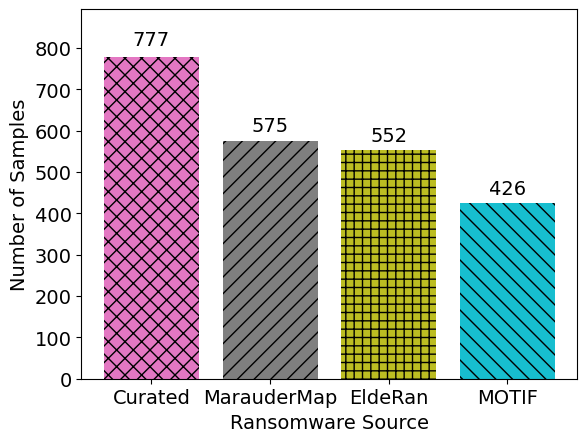

In [4]:
# Generate the plot based on the ransomware_type distribution for Ransomware (sample_type == 1)
ransomware_type_counts = df_mlran_meta[df_mlran_meta['sample_type'] == 1]['source'].value_counts()

# Plotting the bar chart with color-blind friendly colours and shapes
fig, ax = plt.subplots()

# Mapping the ransomware types to sentence case
ransomware_type_map = {
    'curated': 'Curated',
    'marauder': 'MarauderMap',
    'elderan': 'EldeRan',
    'motif': 'MOTIF'
}

# Plotting the bars with different hatching patterns
bars = ax.bar(ransomware_type_counts.index.map(ransomware_type_map), ransomware_type_counts.values, color=['#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Adding hatch patterns for better visibility
bars[0].set_hatch('xx')  # Crosshatch for the first bar (crypto)
bars[1].set_hatch('//')  # Diagonal lines for the second bar (raas)
bars[2].set_hatch('++')  # Grid pattern for the third bar (modern)
bars[3].set_hatch('\\\\')  # Diagonal backslash for the fourth bar (locker)

# Adding frequency numbers on top of the bars with consistent spacing
for bar in bars:
    yval = bar.get_height()
    # Calculate the vertical offset to ensure it's above the bar without exceeding the plot boundary
    offset = 0.025 * yval
    ax.text(bar.get_x() + bar.get_width() / 2, yval + offset, int(yval), ha='center', va='bottom', fontsize=14)

# Increase font size for the axis labels and title
#ax.set_title('Distribution of Ransomware Sample Source', fontsize=14)
ax.set_xlabel('Ransomware Source', fontsize=14)
ax.set_ylabel('Number of Samples', fontsize=14)

# Adjust the font size for tick labels
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Set the y-axis limit based on the maximum value of the data
max_y_value = max(ransomware_type_counts.values)  # Remove the parentheses here
ax.set_ylim(0, max_y_value * 1.15)  # Set the upper limit slightly higher than the max value

# Display the plot
plt.show()


In [5]:
# Save the plot as a PDF file
fig.savefig('outputs/EDA/ransomware_source.pdf', format='pdf' ,bbox_inches='tight')
fig.savefig('outputs/EDA/ransomware_source.png', format='png' ,bbox_inches='tight')

## Timestamp

In [25]:
display(df_mlran_meta[["sample_type", "timestamp"]].head())
display(df_mlran_meta[["sample_type", "timestamp"]].tail())

,sample_type,timestamp
0,1,2014:10:10
1,1,2015:04:02
2,1,2014:01:29
3,1,2015:08:09
4,1,NaN


,sample_type,timestamp
4879,0,1004039231.0
4880,0,1441778346.0
4881,0,NaN
4882,0,1260532064.0
4883,0,1239828229.0


In [26]:
# Remove rows from df_mlran_meta where the 'source' is "elderan"
df_mlran_meta1 = df_mlran_meta[df_mlran_meta['source'] == 'elderan']

print(df_mlran_meta1.shape)

# Displaying the first few rows to verify the removal
display(df_mlran_meta1.head())

(552, 13)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,2014:10:10,elderan
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,2015:04:02,elderan
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,2014:01:29,elderan
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,2015:08:09,elderan
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,NaN,elderan


In [27]:
# Replace colon with hyphen and convert to datetime format
df_mlran_meta1['timestamp2'] = pd.to_datetime(df_mlran_meta1['timestamp'].str.replace(':', '-'), errors='coerce')

# Displaying the first and last few rows to check the results
display(df_mlran_meta1[["sample_type", "timestamp", "timestamp2"]].head(10))
display(df_mlran_meta1[["sample_type", "timestamp", "timestamp2"]].tail(10))

/tmp/ipykernel_2370518/2439795571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlran_meta1['timestamp2'] = pd.to_datetime(df_mlran_meta1['timestamp'].str.replace(':', '-'), errors='coerce')


,sample_type,timestamp,timestamp2
0,1,2014:10:10,2014-10-10
1,1,2015:04:02,2015-04-02
2,1,2014:01:29,2014-01-29
3,1,2015:08:09,2015-08-09
4,1,NaN,NaT
5,1,2015:07:06,2015-07-06
6,1,2013:05:07,2013-05-07
7,1,2008:06:16,2008-06-16
8,1,2012:12:22,2012-12-22
9,1,2002:09:11,2002-09-11


,sample_type,timestamp,timestamp2
542,1,2014:02:18,2014-02-18
543,1,1987:04:19,1987-04-19
544,1,2015:08:07,2015-08-07
545,1,2015:09:03,2015-09-03
546,1,2013:10:02,2013-10-02
547,1,2009:12:05,2009-12-05
548,1,2014:02:20,2014-02-20
549,1,2008:08:20,2008-08-20
550,1,2015:03:27,2015-03-27
551,1,2014:11:14,2014-11-14


In [28]:
# Remove rows from df_mlran_meta where the 'source' is "elderan"
df_mlran_meta2 = df_mlran_meta[df_mlran_meta['source'] != 'elderan']

print(df_mlran_meta2.shape)

# Displaying the first few rows to verify the removal
display(df_mlran_meta2.head())

(4332, 13)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source
552,10583,d90573cdf776f60a91dc57e8c77dd61adbdaaf205de29f...,1,medusalocker,22,raas,3,6abac524387a106f73d9ddb5d8a84cb72dad1cdd,00eae0a97f18a59c0f9b65799b8b1523,exe,61/78,1579338481.0,motif
553,10584,b29421fe98d48f4ce217947e574d11fe903c72a11953b9...,1,nanolocker,34,crypto,2,6c96921e3548923b8f3d61f40e76d3aaa3c757f2,0168927e4cda399ac95ac4e5d43e2309,exe,60/76,1449418481.0,motif
554,10585,ce093ffa19f020a2b73719f653b5e0423df28ef1d59035...,1,gandcrab,7,raas,3,147731983582c2196c304d1e6453cb2d26920756,0301296543c91492d49847ae636857a4,exe,64/76,1531500494.0,motif
555,10586,869594070d2810b964bd43b4b870fb20e851baa3ca5fe7...,1,padcrypt,39,raas,3,21e098a58c11f87dd361a3ada0b7e7117f439da4,04cb6917c78cbba1824a2bf57a26f019,exe,56/76,1454415619.0,motif
556,10587,614bfea6b81f56b59bd0f2222b65b57571796245a7886a...,1,locky,16,crypto,2,80a93c80a18cc4ae3189a944a0c721989f7ad337,051abecc907d95bac508bb5445bd55eb,exe,66/76,1494306560.0,motif


In [29]:
# Convert timestamp column to string and handle the conversion
df_mlran_meta2['timestamp2'] = pd.to_datetime(df_mlran_meta2['timestamp'], errors='coerce', unit='s').dt.date

# Displaying the first and last few rows to check the results
display(df_mlran_meta2[["sample_type", "timestamp", "timestamp2"]].head(10))
display(df_mlran_meta2[["sample_type", "timestamp", "timestamp2"]].tail(10))


/tmp/ipykernel_2370518/1802565909.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_mlran_meta2['timestamp2'] = pd.to_datetime(df_mlran_meta2['timestamp'], errors='coerce', unit='s').dt.date
/tmp/ipykernel_2370518/1802565909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlran_meta2['timestamp2'] = pd.to_datetime(df_mlran_meta2['timestamp'], errors='coerce', unit='s').dt.date


,sample_type,timestamp,timestamp2
552,1,1579338481.0,2020-01-18
553,1,1449418481.0,2015-12-06
554,1,1531500494.0,2018-07-13
555,1,1454415619.0,2016-02-02
556,1,1494306560.0,2017-05-09
557,1,1290243788.0,2010-11-20
558,1,1579899760.0,2020-01-24
559,1,1522223641.0,2018-03-28
560,1,1524447430.0,2018-04-23
561,1,1584721829.0,2020-03-20


,sample_type,timestamp,timestamp2
4874,0,1263409497.0,2010-01-13
4875,0,NaN,NaT
4876,0,1424203145.0,2015-02-17
4877,0,708992537.0,1992-06-19
4878,0,1269435532.0,2010-03-24
4879,0,1004039231.0,2001-10-25
4880,0,1441778346.0,2015-09-09
4881,0,NaN,NaT
4882,0,1260532064.0,2009-12-11
4883,0,1239828229.0,2009-04-15


In [30]:
df_mlran_meta2.head()

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2
552,10583,d90573cdf776f60a91dc57e8c77dd61adbdaaf205de29f...,1,medusalocker,22,raas,3,6abac524387a106f73d9ddb5d8a84cb72dad1cdd,00eae0a97f18a59c0f9b65799b8b1523,exe,61/78,1579338481.0,motif,2020-01-18
553,10584,b29421fe98d48f4ce217947e574d11fe903c72a11953b9...,1,nanolocker,34,crypto,2,6c96921e3548923b8f3d61f40e76d3aaa3c757f2,0168927e4cda399ac95ac4e5d43e2309,exe,60/76,1449418481.0,motif,2015-12-06
554,10585,ce093ffa19f020a2b73719f653b5e0423df28ef1d59035...,1,gandcrab,7,raas,3,147731983582c2196c304d1e6453cb2d26920756,0301296543c91492d49847ae636857a4,exe,64/76,1531500494.0,motif,2018-07-13
555,10586,869594070d2810b964bd43b4b870fb20e851baa3ca5fe7...,1,padcrypt,39,raas,3,21e098a58c11f87dd361a3ada0b7e7117f439da4,04cb6917c78cbba1824a2bf57a26f019,exe,56/76,1454415619.0,motif,2016-02-02
556,10587,614bfea6b81f56b59bd0f2222b65b57571796245a7886a...,1,locky,16,crypto,2,80a93c80a18cc4ae3189a944a0c721989f7ad337,051abecc907d95bac508bb5445bd55eb,exe,66/76,1494306560.0,motif,2017-05-09


In [31]:
# Ensure timestamp2 is in the date-only format for both DataFrames before concatenating
df_mlran_meta1['timestamp2'] = pd.to_datetime(df_mlran_meta1['timestamp2']).dt.date
df_mlran_meta2['timestamp2'] = pd.to_datetime(df_mlran_meta2['timestamp2']).dt.date

# Now concatenate the two DataFrames
df_combined = pd.concat([df_mlran_meta1, df_mlran_meta2], axis=0, ignore_index=True)

# Display the first and last few rows of the combined DataFrame to verify
display(df_combined.head())
display(df_combined.tail())


/tmp/ipykernel_2370518/2561548017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlran_meta1['timestamp2'] = pd.to_datetime(df_mlran_meta1['timestamp2']).dt.date
/tmp/ipykernel_2370518/2561548017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlran_meta2['timestamp2'] = pd.to_datetime(df_mlran_meta2['timestamp2']).dt.date


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,2014:10:10,elderan,2014-10-10
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,2015:04:02,elderan,2015-04-02
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,2014:01:29,elderan,2014-01-29
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,2015:08:09,elderan,2015-08-09
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,NaN,elderan,NaT


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2
4879,15691,94aaabcc6c08fbab44d0efaa5523d50d5f79b27d241cd8...,0,goodware,0,goodware,0,50dca602bc4b1b9b4e2e9447a78e867132a7d67b,03a9fc2997268ebbce2df67e8491b09f,exe,0/78,1004039231.0,software_informer_lifestyle,2001-10-25
4880,15692,f900248973476082f4401339d542e025759b4b71673a23...,0,goodware,0,goodware,0,bced6159e0aa1cbf8a115b2b9a33c9f8df72ce5c,26de8b100eb8cf8496441f1173d85cce,exe,0/75,1441778346.0,software_informer_lifestyle,2015-09-09
4881,15693,aa8f912ca39da2c5190539e41d750241c6b1188ed54995...,0,goodware,0,goodware,0,93d50c493b4c4ea453dfeca4bf663064518efec7,45a879c17b23564b316f0c2879d7951b,zip,0/75,NaN,software_informer_lifestyle,NaT
4882,15694,5a079d94050ae1f8c8eba86dce3802392a3ab2bd0c7b4a...,0,goodware,0,goodware,0,82ad47326b89c364806350e8ae954021aefce734,abae795d3259f6cb0dc0033d7793c4f9,msi,0/76,1260532064.0,software_informer_lifestyle,2009-12-11
4883,15695,0dc88f85c0bd3cce1440d533053d667f2ef36d9ebda473...,0,goodware,0,goodware,0,b09baa4bf1242080b45b72aa9e46fbbe43f5ba98,6e531ff0e122e11240e224391efd5e64,exe,0/78,1239828229.0,software_informer_lifestyle,2009-04-15


In [32]:
df_combined.shape

(4884, 14)

In [33]:
#df_combined.to_csv('FS_MLRan_Datasets/mlran_dataset_metadata_new.csv', index=False)

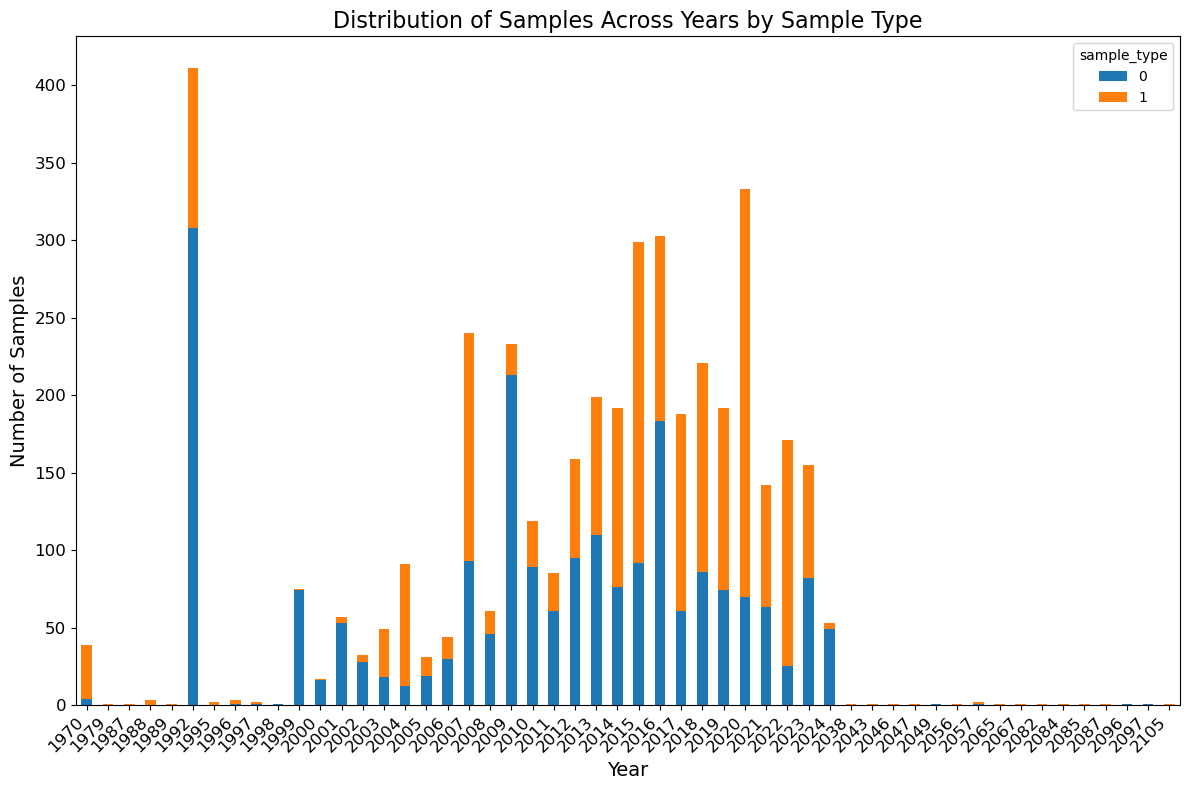

In [34]:
# Convert 'timestamp2' to datetime format
df_combined['timestamp2'] = pd.to_datetime(df_combined['timestamp2'], errors='coerce')

# Extract Year from 'timestamp2' and create a new column for year, ensuring the year is an integer
df_combined['Year'] = df_combined['timestamp2'].dt.year.astype('Int64')

# Group by 'Year' and 'sample_type' and count occurrences
sample_counts_year = df_combined.groupby(['Year', 'sample_type']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the stacked bar chart
sample_counts_year.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Adding labels and title
ax.set_title('Distribution of Samples Across Years by Sample Type', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Samples', fontsize=14)

# Formatting the x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [35]:
# Find the minimum and maximum year in the 'timestamp2' column of df_combined
min_year = df_combined['timestamp2'].dt.year.min()
max_year = df_combined['timestamp2'].dt.year.max()

(min_year, max_year)


(1970.0, 2105.0)

In [36]:
df_combined.head()

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,2014:10:10,elderan,2014-10-10,2014
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,2015:04:02,elderan,2015-04-02,2015
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,2014:01:29,elderan,2014-01-29,2014
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,2015:08:09,elderan,2015-08-09,2015
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,NaN,elderan,NaT,<NA>


In [37]:
# Checking for any years greater than 2025 in the 'timestamp2' column
out_of_range_years = df_combined[df_combined['Year'] > 2025]
out_of_range_years

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year
116,10119,35feca9e071bb3f7ada5d6ec0b28e1905548a82baa5c07...,1,matsnu,11,locker,1,d5aab02162b7a72cb987b7a34629e55ef87d089f,018cb8a80fb37b5bc93577be1a4537f2,exe,8/42,2105:11:06,elderan,2105-11-06,2105
416,10447,c64fc7bba097750482ec3de7b1e091c38dfac2680bf745...,1,locker,4,crypto,2,97964b69a18810843fd4a5a34fc5ecd8bab437b6,428559df255a6561aa7cab2306282bac,exe,23/46,2046:11:09,elderan,2046-11-09,2046
628,10663,b1e97cd1ae60622ae83c56c9d15895a24405f949e4bb33...,1,medusalocker,22,raas,3,78bcffb9ee6a7d29e18f66c0138aa3fd3a9225fa,38b1cdb61aff9b5096cc971cbb3159e0,exe,63/78,3079905405.0,motif,2067-08-07,2067
1112,11162,3212602a1f183aa17b1d7b9cffd293dbf2938848f86680...,1,wacatac,10,crypto,2,d41203e44c5ba1fa7049dd99d906c11bf35a41ad,184d444d077d0d2abaf7c391c6032b36,exe,17/76,2169665029.0,marauder,2038-10-02,2038
1165,11215,ae91da58a702252cc0dabcf19fa65e9655c7b7143e71e0...,1,cryptolocker,3,crypto,2,7f15507c7798d8b99696c19929c86c6c629eb2f5,61fccc142e2bbf498885bb6e42bae62c,exe,52/75,2741229943.0,marauder,2056-11-12,2056
1266,11320,7980ef30b9bed26a9823d3dd5746cdefe5d01de2b2eb2c...,1,hiddentear,52,crypto,2,110301b5f4eced3c0d6712f023d3e0212515bf99,b226803ac5a68cd86ecb7c0c6c4e9d00,exe,60/77,3540123288.0,marauder,2082-03-07,2082
1320,11383,2b5c0eed6f0e364b39dba4263611b01e7c2399232fbf23...,1,crypmodadv,15,crypto,2,8fa5d4312dd5f1964a3bd34d2c09842ec02f135c,668983cf8223a398f4b8a1a4d7cddb7a,exe,63/78,2770783303.0,marauder,2057-10-20,2057
1603,11714,3002809247e507638ee0f35fa44c7feee2ef270b8b3979...,1,royal,59,modern,4,27c0fe34c5cba9f6232d06c264ff14f31693e693,2f5d60c2475b723526fbdadeff55c3c7,exe,38/77,3603524716.0,curated,2084-03-10,2084
1751,11875,9350d71ae24d33f0ef91fc545c6b12d388aac883a55f06...,1,hiddentear,52,crypto,2,06dd694f424f209685f1c29ea614098ddd47f22a,101812ae79631c81e0b2c00bd7229480,exe,58/76,2435790493.0,curated,2047-03-10,2047
1752,11876,1aa9716d4d2bb22285993a195d70565e8ab1420f81f5fd...,1,hiddentear,52,crypto,2,7047f5c03ebd28f024dadec77718ab0e1fcc0ed4,67ba624e074ac4c20f5edb9ccfb95ab5,exe,52/78,3708519345.0,curated,2087-07-08,2087


In [38]:
out_of_range_years.shape

(17, 15)

In [39]:
# Replace 'timestamp' and 'Year' columns with NaN for rows with years greater than 2025
df_combined.loc[df_combined['Year'] > 2025, ['timestamp', 'timestamp2', 'Year-Month', 'Year']] = [pd.NaT, pd.NaT,pd.NaT,pd.NA]

# Verify the result by checking rows with years greater than 2025
out_of_range_years_after_fix = df_combined[df_combined['Year'] > 2025]
display(out_of_range_years_after_fix)

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month


In [40]:
# Shape of the dataset
print("\nShape of the dataset:")
print(df_combined.shape)

# Check basic information about the dataset
print("\nDataset Info:")
display(df_combined.info())


Shape of the dataset:
(4884, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sample_id          4884 non-null   int64         
 1   sha256             4884 non-null   object        
 2   sample_type        4884 non-null   int64         
 3   ransomware_family  4884 non-null   object        
 4   family_label       4884 non-null   int64         
 5   ransomware_type    4884 non-null   object        
 6   type_label         4884 non-null   int64         
 7   sha1               4884 non-null   object        
 8   md5                4884 non-null   object        
 9   extension          4838 non-null   object        
 10  detections         4884 non-null   object        
 11  timestamp          4207 non-null   object        
 12  source             4884 non-null   object        
 13  timestamp2    

None

In [41]:
# Check for missing values
missing_values = df_combined.isnull().sum()
missing_percentage = (missing_values / len(df_combined)) * 100

# Create a DataFrame to display the missing count and percentage
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage.round(2)
})
missing_data


,Missing Values,Missing Percentage (%)
sample_id,0,0.00
sha256,0,0.00
sample_type,0,0.00
ransomware_family,0,0.00
family_label,0,0.00
ransomware_type,0,0.00
type_label,0,0.00
sha1,0,0.00
md5,0,0.00
extension,46,0.94


**REMARK:** Initially, there were 660 missing values in the `timestamp` column. After reviewing the data, I found 17 values with years exceeding 2025, which I have replace with NaT. As a result, the total number of missing values in the `timestamp` column has increased to 677. I will now proceed to replace these 677 missing values with the mode of the `timestamp` for the specific family to which the sample belongs. For goodware samples, the mode will be determined by the most common timestamp in the corresponding category.

In [42]:
df_combined.head()

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,2014:10:10,elderan,2014-10-10,2014,NaT
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,2015:04:02,elderan,2015-04-02,2015,NaT
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,2014:01:29,elderan,2014-01-29,2014,NaT
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,2015:08:09,elderan,2015-08-09,2015,NaT
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,NaN,elderan,NaT,<NA>,NaT


In [43]:
# Replace missing values in "timestamp" for ransomware (sample_type == 1)
# Use the mode of the 'timestamp' for the same 'ransomware_family'
for family in df_combined[df_combined['sample_type'] == 1]['ransomware_family'].unique():
    mode_timestamp = df_combined[df_combined['ransomware_family'] == family]['timestamp'].mode()
    if not mode_timestamp.empty:  # Check if the mode is not empty
        df_combined.loc[
            (df_combined['sample_type'] == 1) & 
            (df_combined['ransomware_family'] == family) & 
            df_combined['timestamp'].isnull(), 
            'timestamp'
        ] = mode_timestamp.iloc[0]  # Use .iloc to safely access the first value

# Replace missing values in "timestamp" for goodware (sample_type == 0)
# Use the mode of the 'timestamp' for the same 'source'
for source in df_combined[df_combined['sample_type'] == 0]['source'].unique():
    mode_timestamp = df_combined[df_combined['source'] == source]['timestamp'].mode()
    if not mode_timestamp.empty:  # Check if the mode is not empty
        df_combined.loc[
            (df_combined['sample_type'] == 0) & 
            (df_combined['source'] == source) & 
            df_combined['timestamp'].isnull(), 
            'timestamp'
        ] = mode_timestamp.iloc[0]  # Use .iloc to safely access the first value

# Display the first and last few rows of the combined DataFrame to verify
display(df_combined.head())
display(df_combined.tail())

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,2014:10:10,elderan,2014-10-10,2014,NaT
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,2015:04:02,elderan,2015-04-02,2015,NaT
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,2014:01:29,elderan,2014-01-29,2014,NaT
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,2015:08:09,elderan,2015-08-09,2015,NaT
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,1992:06:19,elderan,NaT,<NA>,NaT


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month
4879,15691,94aaabcc6c08fbab44d0efaa5523d50d5f79b27d241cd8...,0,goodware,0,goodware,0,50dca602bc4b1b9b4e2e9447a78e867132a7d67b,03a9fc2997268ebbce2df67e8491b09f,exe,0/78,1004039231.0,software_informer_lifestyle,2001-10-25,2001,NaT
4880,15692,f900248973476082f4401339d542e025759b4b71673a23...,0,goodware,0,goodware,0,bced6159e0aa1cbf8a115b2b9a33c9f8df72ce5c,26de8b100eb8cf8496441f1173d85cce,exe,0/75,1441778346.0,software_informer_lifestyle,2015-09-09,2015,NaT
4881,15693,aa8f912ca39da2c5190539e41d750241c6b1188ed54995...,0,goodware,0,goodware,0,93d50c493b4c4ea453dfeca4bf663064518efec7,45a879c17b23564b316f0c2879d7951b,zip,0/75,708992537.0,software_informer_lifestyle,NaT,<NA>,NaT
4882,15694,5a079d94050ae1f8c8eba86dce3802392a3ab2bd0c7b4a...,0,goodware,0,goodware,0,82ad47326b89c364806350e8ae954021aefce734,abae795d3259f6cb0dc0033d7793c4f9,msi,0/76,1260532064.0,software_informer_lifestyle,2009-12-11,2009,NaT
4883,15695,0dc88f85c0bd3cce1440d533053d667f2ef36d9ebda473...,0,goodware,0,goodware,0,b09baa4bf1242080b45b72aa9e46fbbe43f5ba98,6e531ff0e122e11240e224391efd5e64,exe,0/78,1239828229.0,software_informer_lifestyle,2009-04-15,2009,NaT


In [44]:
# Check for missing values
missing_values = df_combined.isnull().sum()
missing_percentage = (missing_values / len(df_combined)) * 100

# Create a DataFrame to display the missing count and percentage
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage.round(2)
})
missing_data

,Missing Values,Missing Percentage (%)
sample_id,0,0.00
sha256,0,0.00
sample_type,0,0.00
ransomware_family,0,0.00
family_label,0,0.00
ransomware_type,0,0.00
type_label,0,0.00
sha1,0,0.00
md5,0,0.00
extension,46,0.94


**REMARK:** I still have 46 missing values. In the next column I dig to see what these are.

In [45]:
# Find rows where 'timestamp' is missing (NaT or NaN)
missing_timestamp_rows = df_combined[df_combined['timestamp'].isnull()]

# Display the rows with missing timestamps
display(missing_timestamp_rows)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month
980,11028,fd046b8ed4af92e58baa9e7cc0b84122661243659dd0b8...,1,crypmodadv,15,crypto,2,f80b8f0ce5a1a15e722d4bc557e01ca1e95b806f,3e550b9e29e973e30db41b67f5efffe0,exe,54/74,NaN,marauder,NaT,<NA>,NaT
998,11047,c0df16f46ffbf39b45dfbbbd969ef42768a594467f1228...,1,crypmodadv,15,crypto,2,500e81601fdb9f21f26366df0a709645bfcea546,8bc626787c4b9db824a5605886d70dd0,exe,54/75,NaN,marauder,NaT,<NA>,NaT
1007,11056,4c0f26d700ed4ea5632df35080e504ab4f3862b3de5a41...,1,crypmodadv,15,crypto,2,7193529046deb226e77307a4944a74ca9ccb21c3,f0fcb61eb3a1b2464b24ba85a3446610,exe,54/75,NaN,marauder,NaT,<NA>,NaT
1021,11071,57ec96fc7b00ce8849c578150adea11cdf8c2708933469...,1,crypmodadv,15,crypto,2,d1f253842f4bbdfdba55040b81410850fa06e245,307a36ce4ca07e2794f7d9127dbba1e0,exe,52/75,NaN,marauder,NaT,<NA>,NaT
1024,11074,05909d89a2dd7158edbe83a8d7e032cbd0928c18380bfe...,1,crypmodadv,15,crypto,2,0201e8cb92bf8ae995174c46732b5d06cf3f1a15,8390f5bdab2fa9fc878c634c63ea7230,exe,55/75,NaN,marauder,NaT,<NA>,NaT
1030,11080,7a115e6ca95f66e18949928edbaf7a46d1fb13e959f5fd...,1,crypmodadv,15,crypto,2,ee86ee1d04665cfca78881ff4828e63b1c11dee0,0e735899c6fdf81ee866ab05d3e0f340,exe,55/75,NaN,marauder,NaT,<NA>,NaT
1037,11087,50c38795149e886d1bedb023fa7e9ff35fd2310c756c54...,1,crypmodadv,15,crypto,2,b53e5cda3d0afb182d21a143bdd8a798e8d865e0,4223c825a8950b7bb90254348fc5d050,exe,54/75,NaN,marauder,NaT,<NA>,NaT
1044,11094,bf1137f4d5f76e3930e215154954a68a738ff262200693...,1,crypmodadv,15,crypto,2,7e46a6fa9e59f67810fc40496a64fcdde8ce4b8b,28540cde9986d18474180f399bf84590,exe,54/75,NaN,marauder,NaT,<NA>,NaT
1058,11108,ef5f82476dae6977c6f504ea61c6d10ce8cde39277943b...,1,crypmodadv,15,crypto,2,8cc238dcb22253a45ee45776324f3cc10e5afabd,ca5219ef58c448979b642b0d5907a090,exe,55/75,NaN,marauder,NaT,<NA>,NaT
1060,11110,592722e836e17d56ff5a0f2d77a1698e15be29f3b87941...,1,crypmodadv,15,crypto,2,af5203d701a11b7a563649ee843c798730b2a168,4e3eb38119cbe5526edfcdf4fbaf0480,exe,55/76,NaN,marauder,NaT,<NA>,NaT


In [46]:
missing_timestamp_rows.shape

(47, 16)

**REMARK:** The crypmodadv ransomware family contains 47 samples and the timestamp of all these samples are missing. Hence, we will search more about this sample and select a date that would represent all. According to Fortiguard report: https://www.fortiguard.com/encyclopedia/virus/10000269, they added the sig on 2021-02-04. I will use this date as the date for all crypmodadv in the sample.

In [47]:
# Replace all missing 'timestamp' values with the specified date '2021-02-04'
df_combined.loc[df_combined['timestamp'].isnull(), 'timestamp'] = pd.to_datetime('2021-02-04')

# Display the updated rows with missing timestamps replaced
display(df_combined[df_combined['timestamp'].isnull()])


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month


In [48]:
# Check for missing values
missing_values = df_combined.isnull().sum()
missing_percentage = (missing_values / len(df_combined)) * 100

# Create a DataFrame to display the missing count and percentage
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage.round(2)
})
missing_data

,Missing Values,Missing Percentage (%)
sample_id,0,0.00
sha256,0,0.00
sample_type,0,0.00
ransomware_family,0,0.00
family_label,0,0.00
ransomware_type,0,0.00
type_label,0,0.00
sha1,0,0.00
md5,0,0.00
extension,46,0.94


In [49]:
display(df_combined.head(10))
display(df_combined.tail(10))

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,2014:10:10,elderan,2014-10-10,2014,NaT
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,2015:04:02,elderan,2015-04-02,2015,NaT
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,2014:01:29,elderan,2014-01-29,2014,NaT
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,2015:08:09,elderan,2015-08-09,2015,NaT
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,1992:06:19,elderan,NaT,<NA>,NaT
5,10006,0153949986a2ff771ef62670ded348023fbfae7bf0bb95...,1,kovter,9,locker,1,0278944425546630a6aa60fb5abf2b808b446431,ff189061d35cff903af5d25858d6c484,exe,35/54,2015:07:06,elderan,2015-07-06,2015,NaT
6,10007,017428052ed5814eacf30cf6b4596468412805086e1afb...,1,locker,4,crypto,2,b20634b6904689db5136a339baecda7fc90c7078,886b02878836e8bc1e06ccfe73cf1d5b,exe,30/47,2013:05:07,elderan,2013-05-07,2013,NaT
7,10008,0271d95f3d05175b71846709afa4194f99dfb886afc788...,1,critroni,14,crypto,2,d2389c5d158d27713c84584a0230e91de29660df,f6fa4051156b35d3a8c9261cb0128d70,dll,47/54,2008:06:16,elderan,2008-06-16,2008,NaT
8,10009,028df70f286c84d3bdd94ce817afee7bf23cab3a58a82d...,1,locker,4,crypto,2,f2dd4a0517d1d1c8824a2cc84c12a3f3ddac8cc2,4d36c89ec1915d018b47fc1ddd685234,dll,40/46,2012:12:22,elderan,2012-12-22,2012,NaT
9,10010,02945ecebe2bc3bf841946c232c3217a30e01b9c84b6cd...,1,locker,4,crypto,2,3f126155d0fa803f8043924ce65bacf859b06d9c,3f82790d2d8ad5ddd17b11c911e4352d,exe,24/45,2002:09:11,elderan,2002-09-11,2002,NaT


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month
4874,15686,6475679049229d84b00f30b40ee42861faaf3dc932be06...,0,goodware,0,goodware,0,b64ffab6adc0aed052d5d9def6d32c90f05d88a4,63a62c06cfe0ee902d34f55fd7d16342,exe,0/77,1263409497.0,software_informer_lifestyle,2010-01-13,2010,NaT
4875,15687,e22fe8c465f9a7095cfc4f56d84bfdbbb65c97fb68398f...,0,goodware,0,goodware,0,05d51f5a17caa7f80d627875b95f91c11e9633dc,7d48178b2bf1867c9ff92568f037f046,zip,0/76,708992537.0,software_informer_lifestyle,NaT,<NA>,NaT
4876,15688,29c2490052e07c3496318f9799cfb683c4dc16a6861a27...,0,goodware,0,goodware,0,6ac11dcdf01d3d945daaf6ad4c08b2e980e7b4e5,d5e54f205757785998bd486d4890a47d,msi,0/78,1424203145.0,software_informer_lifestyle,2015-02-17,2015,NaT
4877,15689,9754108e34e82919b5639458fc0069bd4ebd277b8291b9...,0,goodware,0,goodware,0,8282a9217508afabb21ae00beebe8e2f67d0582b,dbd0bbdc6db626e450e506793d0b9c05,exe,0/78,708992537.0,software_informer_lifestyle,1992-06-19,1992,NaT
4878,15690,df41655ea2dc029cc43d3734dff5e581b8703bb8a9f731...,0,goodware,0,goodware,0,94af97ddbf4389cfada058131d485526b693b5b9,e00eaaadc0d886811a58da156fa3497d,exe,0/77,1269435532.0,software_informer_lifestyle,2010-03-24,2010,NaT
4879,15691,94aaabcc6c08fbab44d0efaa5523d50d5f79b27d241cd8...,0,goodware,0,goodware,0,50dca602bc4b1b9b4e2e9447a78e867132a7d67b,03a9fc2997268ebbce2df67e8491b09f,exe,0/78,1004039231.0,software_informer_lifestyle,2001-10-25,2001,NaT
4880,15692,f900248973476082f4401339d542e025759b4b71673a23...,0,goodware,0,goodware,0,bced6159e0aa1cbf8a115b2b9a33c9f8df72ce5c,26de8b100eb8cf8496441f1173d85cce,exe,0/75,1441778346.0,software_informer_lifestyle,2015-09-09,2015,NaT
4881,15693,aa8f912ca39da2c5190539e41d750241c6b1188ed54995...,0,goodware,0,goodware,0,93d50c493b4c4ea453dfeca4bf663064518efec7,45a879c17b23564b316f0c2879d7951b,zip,0/75,708992537.0,software_informer_lifestyle,NaT,<NA>,NaT
4882,15694,5a079d94050ae1f8c8eba86dce3802392a3ab2bd0c7b4a...,0,goodware,0,goodware,0,82ad47326b89c364806350e8ae954021aefce734,abae795d3259f6cb0dc0033d7793c4f9,msi,0/76,1260532064.0,software_informer_lifestyle,2009-12-11,2009,NaT
4883,15695,0dc88f85c0bd3cce1440d533053d667f2ef36d9ebda473...,0,goodware,0,goodware,0,b09baa4bf1242080b45b72aa9e46fbbe43f5ba98,6e531ff0e122e11240e224391efd5e64,exe,0/78,1239828229.0,software_informer_lifestyle,2009-04-15,2009,NaT


In [50]:
# Remove rows from df_mlran_meta where the 'source' is "elderan"
df_combined2 = df_combined[df_combined['source'] != 'elderan']

# Convert timestamp column to string and handle the conversion
df_combined2['new_timestamp'] = pd.to_datetime(df_combined2['timestamp'], errors='coerce', unit='s').dt.date

# Displaying the first and last few rows to check the results
display(df_combined2[["sample_type", "timestamp", "new_timestamp"]].head(10))
display(df_combined2[["sample_type", "timestamp", "new_timestamp"]].tail(10))

/tmp/ipykernel_2370518/3528425274.py:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_combined2['new_timestamp'] = pd.to_datetime(df_combined2['timestamp'], errors='coerce', unit='s').dt.date
/tmp/ipykernel_2370518/3528425274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined2['new_timestamp'] = pd.to_datetime(df_combined2['timestamp'], errors='coerce', unit='s').dt.date


,sample_type,timestamp,new_timestamp
552,1,1579338481.0,2020-01-18
553,1,1449418481.0,2015-12-06
554,1,1531500494.0,2018-07-13
555,1,1454415619.0,2016-02-02
556,1,1494306560.0,2017-05-09
557,1,1290243788.0,2010-11-20
558,1,1579899760.0,2020-01-24
559,1,1522223641.0,2018-03-28
560,1,1524447430.0,2018-04-23
561,1,1584721829.0,2020-03-20


,sample_type,timestamp,new_timestamp
4874,0,1263409497.0,2010-01-13
4875,0,708992537.0,1992-06-19
4876,0,1424203145.0,2015-02-17
4877,0,708992537.0,1992-06-19
4878,0,1269435532.0,2010-03-24
4879,0,1004039231.0,2001-10-25
4880,0,1441778346.0,2015-09-09
4881,0,708992537.0,1992-06-19
4882,0,1260532064.0,2009-12-11
4883,0,1239828229.0,2009-04-15


In [51]:
df_combined2.isnull().sum()

sample_id               0
sha256                  0
sample_type             0
ransomware_family       0
family_label            0
ransomware_type         0
type_label              0
sha1                    0
md5                     0
extension              42
detections              0
timestamp               0
source                  0
timestamp2            622
Year                  622
Year-Month           4332
new_timestamp          48
dtype: int64

In [52]:
# Find rows where 'timestamp' is missing (NaT or NaN)
missing_timestamp_rows = df_combined2[df_combined2['new_timestamp'].isnull()]

# Display the rows with missing timestamps
display(missing_timestamp_rows)

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp
980,11028,fd046b8ed4af92e58baa9e7cc0b84122661243659dd0b8...,1,crypmodadv,15,crypto,2,f80b8f0ce5a1a15e722d4bc557e01ca1e95b806f,3e550b9e29e973e30db41b67f5efffe0,exe,54/74,2021-02-04 00:00:00,marauder,NaT,<NA>,NaT,NaT
998,11047,c0df16f46ffbf39b45dfbbbd969ef42768a594467f1228...,1,crypmodadv,15,crypto,2,500e81601fdb9f21f26366df0a709645bfcea546,8bc626787c4b9db824a5605886d70dd0,exe,54/75,2021-02-04 00:00:00,marauder,NaT,<NA>,NaT,NaT
1007,11056,4c0f26d700ed4ea5632df35080e504ab4f3862b3de5a41...,1,crypmodadv,15,crypto,2,7193529046deb226e77307a4944a74ca9ccb21c3,f0fcb61eb3a1b2464b24ba85a3446610,exe,54/75,2021-02-04 00:00:00,marauder,NaT,<NA>,NaT,NaT
1021,11071,57ec96fc7b00ce8849c578150adea11cdf8c2708933469...,1,crypmodadv,15,crypto,2,d1f253842f4bbdfdba55040b81410850fa06e245,307a36ce4ca07e2794f7d9127dbba1e0,exe,52/75,2021-02-04 00:00:00,marauder,NaT,<NA>,NaT,NaT
1024,11074,05909d89a2dd7158edbe83a8d7e032cbd0928c18380bfe...,1,crypmodadv,15,crypto,2,0201e8cb92bf8ae995174c46732b5d06cf3f1a15,8390f5bdab2fa9fc878c634c63ea7230,exe,55/75,2021-02-04 00:00:00,marauder,NaT,<NA>,NaT,NaT
1030,11080,7a115e6ca95f66e18949928edbaf7a46d1fb13e959f5fd...,1,crypmodadv,15,crypto,2,ee86ee1d04665cfca78881ff4828e63b1c11dee0,0e735899c6fdf81ee866ab05d3e0f340,exe,55/75,2021-02-04 00:00:00,marauder,NaT,<NA>,NaT,NaT
1037,11087,50c38795149e886d1bedb023fa7e9ff35fd2310c756c54...,1,crypmodadv,15,crypto,2,b53e5cda3d0afb182d21a143bdd8a798e8d865e0,4223c825a8950b7bb90254348fc5d050,exe,54/75,2021-02-04 00:00:00,marauder,NaT,<NA>,NaT,NaT
1044,11094,bf1137f4d5f76e3930e215154954a68a738ff262200693...,1,crypmodadv,15,crypto,2,7e46a6fa9e59f67810fc40496a64fcdde8ce4b8b,28540cde9986d18474180f399bf84590,exe,54/75,2021-02-04 00:00:00,marauder,NaT,<NA>,NaT,NaT
1058,11108,ef5f82476dae6977c6f504ea61c6d10ce8cde39277943b...,1,crypmodadv,15,crypto,2,8cc238dcb22253a45ee45776324f3cc10e5afabd,ca5219ef58c448979b642b0d5907a090,exe,55/75,2021-02-04 00:00:00,marauder,NaT,<NA>,NaT,NaT
1060,11110,592722e836e17d56ff5a0f2d77a1698e15be29f3b87941...,1,crypmodadv,15,crypto,2,af5203d701a11b7a563649ee843c798730b2a168,4e3eb38119cbe5526edfcdf4fbaf0480,exe,55/76,2021-02-04 00:00:00,marauder,NaT,<NA>,NaT,NaT


In [53]:
# Replace all missing 'timestamp' values with the specified date '2021-02-04'
df_combined2.loc[df_combined2['new_timestamp'].isnull(), 'new_timestamp'] = pd.to_datetime('2021-02-04')

# Display the updated rows with missing timestamps replaced
display(df_combined2[df_combined2['new_timestamp'].isnull()])

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp


In [54]:
# Remove rows from df_mlran_meta where the 'source' is "elderan"
df_combined1 = df_combined[df_combined['source'] == 'elderan']

# Replace colon with hyphen and convert to datetime format
df_combined1['new_timestamp'] = pd.to_datetime(df_combined1['timestamp'].str.replace(':', '-'), errors='coerce')

# Displaying the first and last few rows to check the results
display(df_combined1[["sample_type", "timestamp", "new_timestamp"]].head(10))
display(df_combined1[["sample_type", "timestamp", "new_timestamp"]].tail(10))

/tmp/ipykernel_2370518/3075745220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined1['new_timestamp'] = pd.to_datetime(df_combined1['timestamp'].str.replace(':', '-'), errors='coerce')


,sample_type,timestamp,new_timestamp
0,1,2014:10:10,2014-10-10
1,1,2015:04:02,2015-04-02
2,1,2014:01:29,2014-01-29
3,1,2015:08:09,2015-08-09
4,1,1992:06:19,1992-06-19
5,1,2015:07:06,2015-07-06
6,1,2013:05:07,2013-05-07
7,1,2008:06:16,2008-06-16
8,1,2012:12:22,2012-12-22
9,1,2002:09:11,2002-09-11


,sample_type,timestamp,new_timestamp
542,1,2014:02:18,2014-02-18
543,1,1987:04:19,1987-04-19
544,1,2015:08:07,2015-08-07
545,1,2015:09:03,2015-09-03
546,1,2013:10:02,2013-10-02
547,1,2009:12:05,2009-12-05
548,1,2014:02:20,2014-02-20
549,1,2008:08:20,2008-08-20
550,1,2015:03:27,2015-03-27
551,1,2014:11:14,2014-11-14


In [55]:
# Display the updated rows with missing timestamps replaced
display(df_combined1[df_combined1['new_timestamp'].isnull()])

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp
66,10067,1cfd5890006c047ef571119325b2642b2b3d349645b7f6...,1,teslacrypt,28,crypto,2,8a5f47c2589a9404617b2f94983b96dc24c7dbc1,7ddef77c68d6a0acc12531a58d3f3743,doc,8/53,1456399383.0,elderan,NaT,<NA>,NaT,NaT
123,10126,39201c07f8a152b8e044402203c0fecb2211957265046c...,1,kollah,23,crypto,2,c660e4295c4dea9f426cb5340e5a634bad4dbe39,e852c78346f4453a6e26ead69be8b0f0,exe,44/54,00:00:00,elderan,NaT,<NA>,NaT,NaT
168,10192,5ac58dd44c2790a5d076fd28e1b8913fbf65f028eb7a32...,1,reveton,5,locker,1,d10fbb55135bcf09e3bdddcd140a663d24eb69a9,a5fff257b81ea19b3509576e552d0b27,dll,34/51,00:00:00,elderan,NaT,<NA>,NaT,NaT


In [56]:
# Display the updated rows with missing timestamps replaced
display(df_combined1[df_combined1['new_timestamp'].isnull()])

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp
66,10067,1cfd5890006c047ef571119325b2642b2b3d349645b7f6...,1,teslacrypt,28,crypto,2,8a5f47c2589a9404617b2f94983b96dc24c7dbc1,7ddef77c68d6a0acc12531a58d3f3743,doc,8/53,1456399383.0,elderan,NaT,<NA>,NaT,NaT
123,10126,39201c07f8a152b8e044402203c0fecb2211957265046c...,1,kollah,23,crypto,2,c660e4295c4dea9f426cb5340e5a634bad4dbe39,e852c78346f4453a6e26ead69be8b0f0,exe,44/54,00:00:00,elderan,NaT,<NA>,NaT,NaT
168,10192,5ac58dd44c2790a5d076fd28e1b8913fbf65f028eb7a32...,1,reveton,5,locker,1,d10fbb55135bcf09e3bdddcd140a663d24eb69a9,a5fff257b81ea19b3509576e552d0b27,dll,34/51,00:00:00,elderan,NaT,<NA>,NaT,NaT


In [57]:
# Replace missing values in 'new_timestamp' by converting 'timestamp' to datetime and extracting the date
df_combined1.loc[df_combined1['new_timestamp'].isnull(), 'new_timestamp'] = pd.to_datetime(
    df_combined1.loc[df_combined1['new_timestamp'].isnull(), 'timestamp'], errors='coerce', unit='s').dt.date

# Display the updated rows with missing timestamps replaced
display(df_combined1[df_combined1['new_timestamp'].isnull()])


/tmp/ipykernel_2370518/4272523773.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_combined1.loc[df_combined1['new_timestamp'].isnull(), 'new_timestamp'] = pd.to_datetime(


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp
123,10126,39201c07f8a152b8e044402203c0fecb2211957265046c...,1,kollah,23,crypto,2,c660e4295c4dea9f426cb5340e5a634bad4dbe39,e852c78346f4453a6e26ead69be8b0f0,exe,44/54,00:00:00,elderan,NaT,<NA>,NaT,NaT
168,10192,5ac58dd44c2790a5d076fd28e1b8913fbf65f028eb7a32...,1,reveton,5,locker,1,d10fbb55135bcf09e3bdddcd140a663d24eb69a9,a5fff257b81ea19b3509576e552d0b27,dll,34/51,00:00:00,elderan,NaT,<NA>,NaT,NaT


In [58]:
# Replace '00:00:00' in 'timestamp' with null (NaT)
df_combined1.loc[df_combined1['timestamp'] == '00:00:00', 'timestamp'] = pd.NaT

# Display the updated rows where 'timestamp' is now NaT
display(df_combined1[df_combined1['timestamp'].isnull()])


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp
123,10126,39201c07f8a152b8e044402203c0fecb2211957265046c...,1,kollah,23,crypto,2,c660e4295c4dea9f426cb5340e5a634bad4dbe39,e852c78346f4453a6e26ead69be8b0f0,exe,44/54,NaT,elderan,NaT,<NA>,NaT,NaT
168,10192,5ac58dd44c2790a5d076fd28e1b8913fbf65f028eb7a32...,1,reveton,5,locker,1,d10fbb55135bcf09e3bdddcd140a663d24eb69a9,a5fff257b81ea19b3509576e552d0b27,dll,34/51,NaT,elderan,NaT,<NA>,NaT,NaT


In [59]:
# Replace missing values in "timestamp" for ransomware (sample_type == 1)
# Use the mode of the 'timestamp' for the same 'ransomware_family'
for family in df_combined1[df_combined1['sample_type'] == 1]['ransomware_family'].unique():
    mode_timestamp = df_combined1[df_combined1['ransomware_family'] == family]['timestamp'].mode()
    if not mode_timestamp.empty:  # Check if the mode is not empty
        df_combined1.loc[
            (df_combined1['sample_type'] == 1) & 
            (df_combined1['ransomware_family'] == family) & 
            df_combined1['timestamp'].isnull(), 
            'timestamp'
        ] = mode_timestamp.iloc[0]  # Use .iloc to safely access the first value

# Replace missing values in "timestamp" for goodware (sample_type == 0)
# Use the mode of the 'timestamp' for the same 'source'
for source in df_combined1[df_combined1['sample_type'] == 0]['source'].unique():
    mode_timestamp = df_combined1[df_combined1['source'] == source]['timestamp'].mode()
    if not mode_timestamp.empty:  # Check if the mode is not empty
        df_combined1.loc[
            (df_combined1['sample_type'] == 0) & 
            (df_combined1['source'] == source) & 
            df_combined1['timestamp'].isnull(), 
            'timestamp'
        ] = mode_timestamp.iloc[0]  # Use .iloc to safely access the first value

# Display the first and last few rows of the combined DataFrame to verify
display(df_combined1.head())
display(df_combined1.tail())


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,2014:10:10,elderan,2014-10-10,2014,NaT,2014-10-10
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,2015:04:02,elderan,2015-04-02,2015,NaT,2015-04-02
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,2014:01:29,elderan,2014-01-29,2014,NaT,2014-01-29
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,2015:08:09,elderan,2015-08-09,2015,NaT,2015-08-09
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,1992:06:19,elderan,NaT,<NA>,NaT,1992-06-19


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp
547,10578,76c859e86430e37d07176a5d12a2e580eab2b33814a363...,1,reveton,5,locker,1,63d96edb0a841609cf9141ea615e2cebb50b0e9f,89f27fdcddd70effce7c3855ab552152,exe,17/57,2009:12:05,elderan,2009-12-05,2009,NaT,2009-12-05
548,10579,7bf573f13eec8a3c579b3f0ea973692e58c93bd4db232b...,1,critroni,14,crypto,2,ab845fde300b5e930d082722b7cd952537ef23be,baf1b78f5f42ff3142ca05c0c436bdc0,exe,43/52,2014:02:20,elderan,2014-02-20,2014,NaT,2014-02-20
549,10580,d3cf5b635d80e1099deb8bdd5701760003d2e905682fa4...,1,locker,4,crypto,2,be952dece18eb7f8b3d58e79467f622d026e83b4,0fb4fa4ac415b16ae4cd0b14f2dd7b32,exe,33/45,2008:08:20,elderan,2008-08-20,2008,NaT,2008-08-20
550,10581,dd85e88c0a8efff2959658cad385fdfeb13cfb8285bb0a...,1,reveton,5,locker,1,5606d42a919ac2ab86a42bc0288d5fb3567aa294,65efc0bd76e37ae96350225c058e4732,exe,30/57,2015:03:27,elderan,2015-03-27,2015,NaT,2015-03-27
551,10582,e53df75663430885ed61f8407ce145af8f0325bed54c85...,1,locker,4,crypto,2,f769696ac1f29b476d6a8cc424d2d680db5f0084,f52e4af90e6daf3c05971be21b334670,dll,42/57,2014:11:14,elderan,2014-11-14,2014,NaT,2014-11-14


In [60]:
df_combined1.shape

(552, 17)

In [61]:
# Display the updated rows where 'timestamp' is now NaT
display(df_combined1[df_combined1['timestamp'].isnull()])

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp


In [62]:
# Display the updated rows where 'timestamp' is now NaT
display(df_combined1[df_combined1['new_timestamp'].isnull()])

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp
123,10126,39201c07f8a152b8e044402203c0fecb2211957265046c...,1,kollah,23,crypto,2,c660e4295c4dea9f426cb5340e5a634bad4dbe39,e852c78346f4453a6e26ead69be8b0f0,exe,44/54,2011:01:28,elderan,NaT,<NA>,NaT,NaT
168,10192,5ac58dd44c2790a5d076fd28e1b8913fbf65f028eb7a32...,1,reveton,5,locker,1,d10fbb55135bcf09e3bdddcd140a663d24eb69a9,a5fff257b81ea19b3509576e552d0b27,dll,34/51,2015:01:29,elderan,NaT,<NA>,NaT,NaT


In [63]:
# Replace colon with hyphen and convert to datetime format
df_combined1['new_timestamp'] = pd.to_datetime(df_combined1['timestamp'].str.replace(':', '-'), errors='coerce')


/tmp/ipykernel_2370518/634356044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined1['new_timestamp'] = pd.to_datetime(df_combined1['timestamp'].str.replace(':', '-'), errors='coerce')


In [64]:
# Display the updated rows where 'timestamp' is now NaT
display(df_combined1[df_combined1['new_timestamp'].isnull()])

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp
66,10067,1cfd5890006c047ef571119325b2642b2b3d349645b7f6...,1,teslacrypt,28,crypto,2,8a5f47c2589a9404617b2f94983b96dc24c7dbc1,7ddef77c68d6a0acc12531a58d3f3743,doc,8/53,1456399383.0,elderan,NaT,<NA>,NaT,NaT


In [65]:
# Replace missing values in 'new_timestamp' by converting 'timestamp' to datetime and extracting the date
df_combined1.loc[df_combined1['new_timestamp'].isnull(), 'new_timestamp'] = pd.to_datetime(
    df_combined1.loc[df_combined1['new_timestamp'].isnull(), 'timestamp'], errors='coerce', unit='s').dt.date

# Display the updated rows with missing timestamps replaced
display(df_combined1[df_combined1['new_timestamp'].isnull()])

/tmp/ipykernel_2370518/4227022941.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_combined1.loc[df_combined1['new_timestamp'].isnull(), 'new_timestamp'] = pd.to_datetime(


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp


In [66]:
# Ensure timestamp2 is in the date-only format for both DataFrames before concatenating
df_combined1['new_timestamp'] = pd.to_datetime(df_combined1['new_timestamp']).dt.date
df_combined2['new_timestamp'] = pd.to_datetime(df_combined2['new_timestamp']).dt.date

# Now concatenate the two DataFrames
df_final = pd.concat([df_combined1, df_combined2], axis=0, ignore_index=True)

# Display the first and last few rows of the combined DataFrame to verify
display(df_final.head())
display(df_final.tail())

/tmp/ipykernel_2370518/3477679908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined1['new_timestamp'] = pd.to_datetime(df_combined1['new_timestamp']).dt.date
/tmp/ipykernel_2370518/3477679908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined2['new_timestamp'] = pd.to_datetime(df_combined2['new_timestamp']).dt.date


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,2014:10:10,elderan,2014-10-10,2014,NaT,2014-10-10
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,2015:04:02,elderan,2015-04-02,2015,NaT,2015-04-02
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,2014:01:29,elderan,2014-01-29,2014,NaT,2014-01-29
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,2015:08:09,elderan,2015-08-09,2015,NaT,2015-08-09
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,1992:06:19,elderan,NaT,<NA>,NaT,1992-06-19


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,timestamp,source,timestamp2,Year,Year-Month,new_timestamp
4879,15691,94aaabcc6c08fbab44d0efaa5523d50d5f79b27d241cd8...,0,goodware,0,goodware,0,50dca602bc4b1b9b4e2e9447a78e867132a7d67b,03a9fc2997268ebbce2df67e8491b09f,exe,0/78,1004039231.0,software_informer_lifestyle,2001-10-25,2001,NaT,2001-10-25
4880,15692,f900248973476082f4401339d542e025759b4b71673a23...,0,goodware,0,goodware,0,bced6159e0aa1cbf8a115b2b9a33c9f8df72ce5c,26de8b100eb8cf8496441f1173d85cce,exe,0/75,1441778346.0,software_informer_lifestyle,2015-09-09,2015,NaT,2015-09-09
4881,15693,aa8f912ca39da2c5190539e41d750241c6b1188ed54995...,0,goodware,0,goodware,0,93d50c493b4c4ea453dfeca4bf663064518efec7,45a879c17b23564b316f0c2879d7951b,zip,0/75,708992537.0,software_informer_lifestyle,NaT,<NA>,NaT,1992-06-19
4882,15694,5a079d94050ae1f8c8eba86dce3802392a3ab2bd0c7b4a...,0,goodware,0,goodware,0,82ad47326b89c364806350e8ae954021aefce734,abae795d3259f6cb0dc0033d7793c4f9,msi,0/76,1260532064.0,software_informer_lifestyle,2009-12-11,2009,NaT,2009-12-11
4883,15695,0dc88f85c0bd3cce1440d533053d667f2ef36d9ebda473...,0,goodware,0,goodware,0,b09baa4bf1242080b45b72aa9e46fbbe43f5ba98,6e531ff0e122e11240e224391efd5e64,exe,0/78,1239828229.0,software_informer_lifestyle,2009-04-15,2009,NaT,2009-04-15


In [67]:
df_final.shape

(4884, 17)

In [68]:
# Check for missing values
missing_values = df_final.isnull().sum()
missing_percentage = (missing_values / len(df_final)) * 100

# Create a DataFrame to display the missing count and percentage
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage.round(2)
})
missing_data

,Missing Values,Missing Percentage (%)
sample_id,0,0.00
sha256,0,0.00
sample_type,0,0.00
ransomware_family,0,0.00
family_label,0,0.00
ransomware_type,0,0.00
type_label,0,0.00
sha1,0,0.00
md5,0,0.00
extension,46,0.94


In [69]:
df_final.columns

Index(['sample_id', 'sha256', 'sample_type', 'ransomware_family',
       'family_label', 'ransomware_type', 'type_label', 'sha1', 'md5',
       'extension', 'detections', 'timestamp', 'source', 'timestamp2', 'Year',
       'Year-Month', 'new_timestamp'],
      dtype='object')

In [70]:
df_to_save = df_final[['sample_id', 'sha256', 'sample_type', 'ransomware_family',
       'family_label', 'ransomware_type', 'type_label', 'sha1', 'md5',
       'extension', 'detections', 'source', 'timestamp','new_timestamp']]
df_to_save.head()

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,elderan,2014:10:10,2014-10-10
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,elderan,2015:04:02,2015-04-02
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,elderan,2014:01:29,2014-01-29
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,elderan,2015:08:09,2015-08-09
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,elderan,1992:06:19,1992-06-19


In [71]:
df_old = df_mlran_meta[['sample_id', 'timestamp']]

# Rename the 'timestamp' column to 'old_timestamp' in df_mlran_meta
df_old.rename(columns={'timestamp': 'old_timestamp'}, inplace=True)

# Display the first few rows to verify the column renaming
display(df_old[['sample_id', 'old_timestamp']].head())

/tmp/ipykernel_2370518/118193594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old.rename(columns={'timestamp': 'old_timestamp'}, inplace=True)


,sample_id,old_timestamp
0,10001,2014:10:10
1,10002,2015:04:02
2,10003,2014:01:29
3,10004,2015:08:09
4,10005,NaN


In [72]:
# Merge df_to_save and df_old based on the common 'sample_id' column
df_merged = pd.merge(df_to_save, df_old, on='sample_id', how='inner')  # Use 'inner' join or adjust as needed

# Display the merged dataframe to verify the result
display(df_merged.head())


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,elderan,2014:10:10,2014-10-10,2014:10:10
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,elderan,2015:04:02,2015-04-02,2015:04:02
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,elderan,2014:01:29,2014-01-29,2014:01:29
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,elderan,2015:08:09,2015-08-09,2015:08:09
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,elderan,1992:06:19,1992-06-19,NaN


In [73]:
df_merged.shape

(4884, 15)

In [79]:
#df_merged.to_csv('FS_MLRan_Datasets/mlran_dataset_metadata_final.csv', index=False)

In [75]:
# Ensure the 'new_timestamp' column is in datetime format (if not already)
df_merged['new_timestamp'] = pd.to_datetime(df_merged['new_timestamp'], errors='coerce')

# Extract the year from 'new_timestamp' and create a new 'Year' column
df_merged['Year'] = df_merged['new_timestamp'].dt.year

# Display the updated dataframe to verify the new 'Year' column
display(df_merged[['sample_id', 'new_timestamp', 'Year']].head())


,sample_id,new_timestamp,Year
0,10001,2014-10-10,2014
1,10002,2015-04-02,2015
2,10003,2014-01-29,2014
3,10004,2015-08-09,2015
4,10005,1992-06-19,1992


In [76]:
# Display the updated rows with missing timestamps replaced
display(df_merged[df_merged['Year'].isnull()])

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year


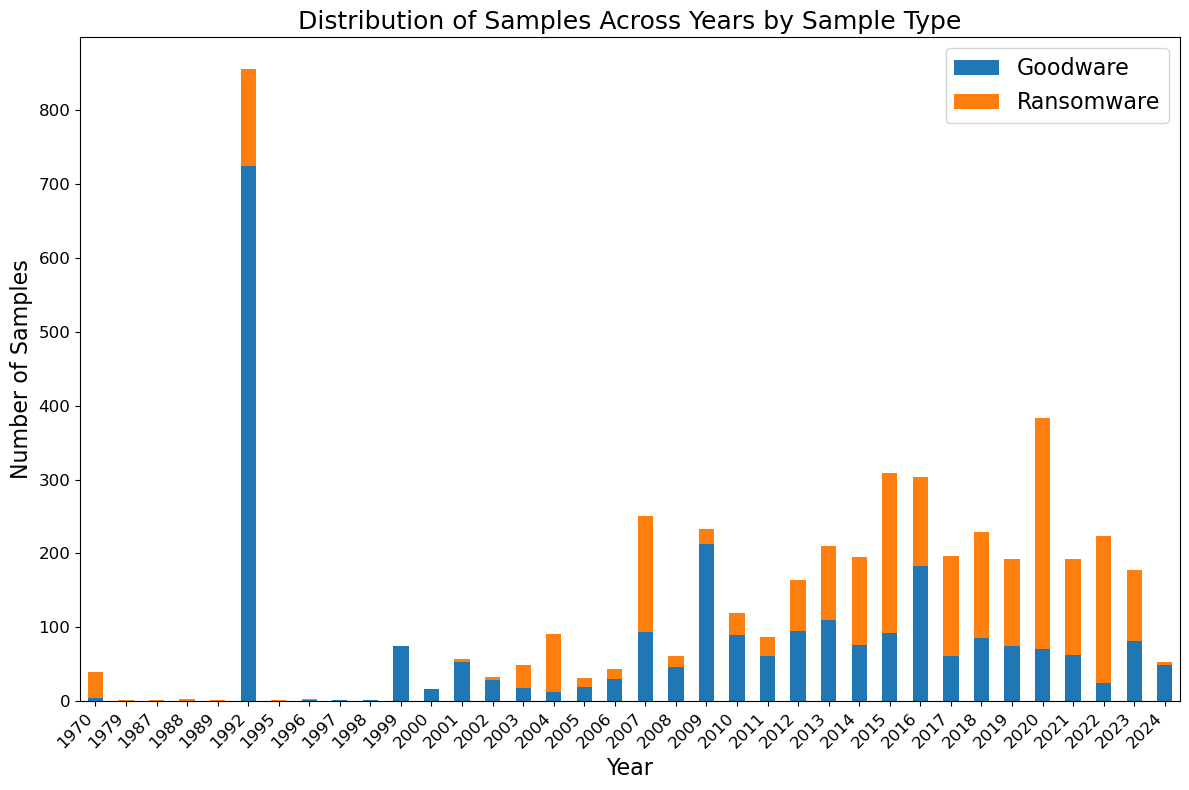

In [77]:
sample_counts_year_cleaned = df_merged.groupby(['Year', 'sample_type']).size().unstack(fill_value=0)

# Plotting the stacked bar chart with a custom legend
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the stacked bar chart
sample_counts_year_cleaned.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Adding labels and title
ax.set_title('Distribution of Samples Across Years by Sample Type', fontsize=18)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Number of Samples', fontsize=16)

# Formatting the x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Adding the custom legend
legend_labels = {0: 'Goodware', 1: 'Ransomware'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels[int(label)] for label in labels], fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


In [78]:
# Save the plot as a PDF file
#fig.savefig('ouputs/EDA/timestamp.pdf', format='pdf' ,bbox_inches='tight')

In [6]:
df_mlran_meta2 = pd.read_csv('FS_MLRan_Datasets/mlran_dataset_metadata.csv')
df_mlran_meta2.head()

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,elderan,2014:10:10,2014-10-10,2014:10:10,2014,1413149304,2014-10-12,2014
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,elderan,2015:04:02,2015-04-02,2015:04:02,2015,1428563179,2015-04-09,2015
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,elderan,2014:01:29,2014-01-29,2014:01:29,2014,1401330145,2014-05-29,2014
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,elderan,2015:08:09,2015-08-09,2015:08:09,2015,1439196631,2015-08-10,2015
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,elderan,1992:06:19,1992-06-19,NaN,1992,1416574498,2014-11-21,2014


In [7]:
df_mlran_meta2.shape

(4884, 19)

In [41]:
df_mlran_meta.head()

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,elderan,2014:10:10,2014-10-10,2014:10:10,2014
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,elderan,2015:04:02,2015-04-02,2015:04:02,2015
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,elderan,2014:01:29,2014-01-29,2014:01:29,2014
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,elderan,2015:08:09,2015-08-09,2015:08:09,2015
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,elderan,1992:06:19,1992-06-19,NaN,1992


In [12]:
# Save the plot as a PDF file
#fig.savefig('ouputs/EDA/first_submission_date.pdf', format='pdf' ,bbox_inches='tight')

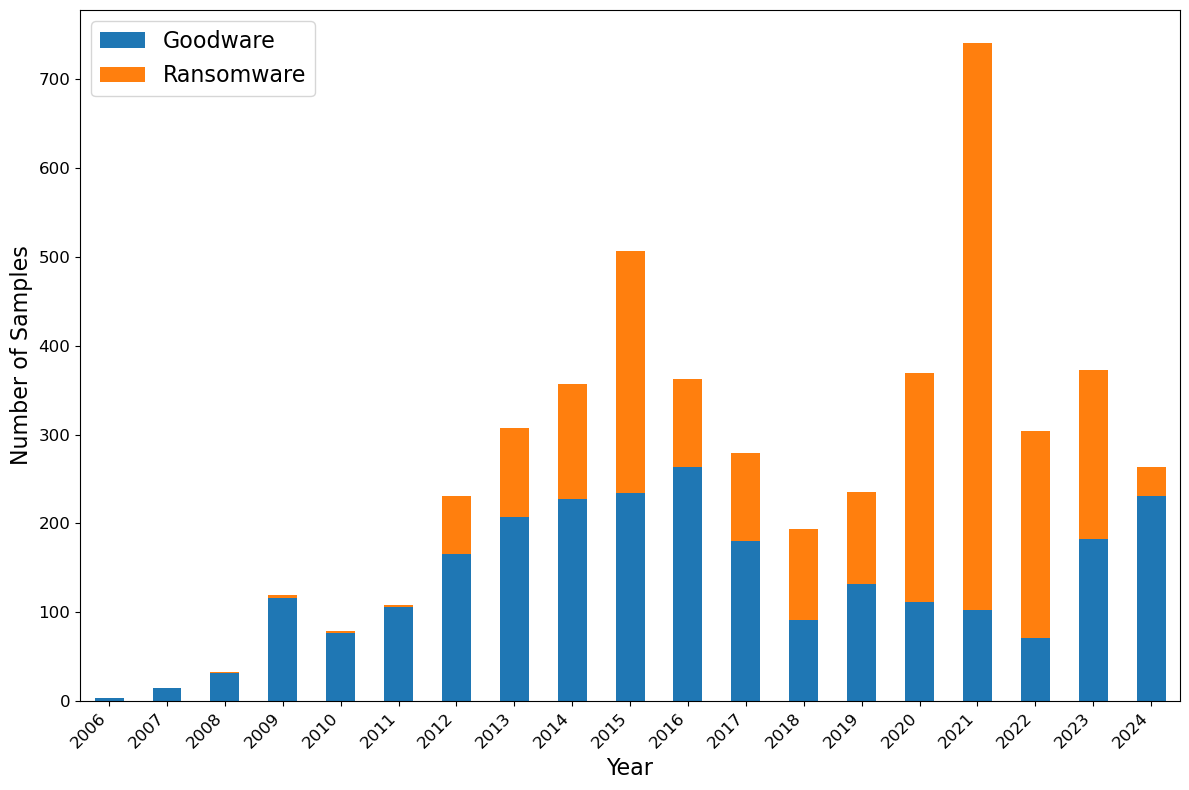

In [49]:
sample_counts_year_cleaned = df_mlran_meta.groupby(['first_submission_date_year', 'sample_type']).size().unstack(fill_value=0)

# Plotting the stacked bar chart with a custom legend
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the stacked bar chart
sample_counts_year_cleaned.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Adding labels and title
#ax.set_title('Distribution of Samples Across Years by Sample Type', fontsize=18)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Number of Samples', fontsize=16)

# Formatting the x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Adding the custom legend
legend_labels = {0: 'Goodware', 1: 'Ransomware'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels[int(label)] for label in labels], fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


In [50]:
# Save the plot as a PDF file
fig.savefig('outputs/EDA/first_submission_date.pdf', format='pdf' ,bbox_inches='tight')
fig.savefig('outputs/EDA/first_submission_date.png', format='png' ,bbox_inches='tight')